In [1]:
# importing libraries
import pandas as pd # the pd is by convention
import numpy as np # as is the np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates
import seaborn as sns
import geopandas as gpd
import zipfile
from zipfile import ZipFile
from io import BytesIO
import os
import zipfile
from zipfile import ZipFile
from os.path import basename
import requests
import urllib
import squarify  

# to Plot matplotlib figures inline on the notebook
%matplotlib inline
sns.set(color_codes=True)

In [2]:
#Printing verions of Python modules and packages with **watermark** - the IPython magic extension.

%reload_ext watermark
%watermark -v -p numpy,pandas,matplotlib,matplotlib.pyplot,seaborn

CPython 3.7.1
IPython 7.2.0

numpy 1.16.1
pandas 1.0.0
matplotlib 3.1.1
matplotlib.pyplot 3.1.1
seaborn 0.9.0


In [3]:
url = 'https://health.data.ny.gov/api/views/xdss-u53e/rows.csv?accessType=DOWNLOAD'

covid_19_nys_data = pd.read_csv(url)

In [4]:
covid_19_nys_data.head(10)

Test Date       County  New Positives  Cumulative Number of Positives  \
0  05/04/2020       Albany              7                            1294   
1  05/04/2020     Allegany              0                              35   
2  05/04/2020        Bronx            253                           39476   
3  05/04/2020       Broome              4                             338   
4  05/04/2020  Cattaraugus              0                              53   
5  05/04/2020       Cayuga              0                              51   
6  05/04/2020   Chautauqua              0                              37   
7  05/04/2020      Chemung              0                             126   
8  05/04/2020     Chenango              0                             100   
9  05/04/2020      Clinton              1                              69   

   Total Number of Tests Performed  Cumulative Number of Tests Performed  
0                              130                                 12084  
1                               31                                   637  
2                             2001                                103476  
3                              180                                  3533  
4                               14                                  1142  
5                               22                                  1048  
6                               54                                  1341  
7                              154                                  2077  
8                               42                                   973  
9                               27                                   912

In [5]:
table = covid_19_nys_data.sort_values(by=['Test Date', 'Cumulative Number of Positives'], 
                                ascending=[False, False]).drop_duplicates(subset ="County", 
                                keep = 'first').reset_index(drop=True).head(10)

table['New Positives'] = table['New Positives'].map('{:,}'.format)
table['Cumulative Number of Positives'] = table['Cumulative Number of Positives'].map('{:,}'.format)
table['Total Number of Tests Performed'] = table['Total Number of Tests Performed'].map('{:,}'.format)
table['Cumulative Number of Tests Performed'] = table['Cumulative Number of Tests Performed'].map('{:,}'.format)
table.drop(['Test Date', 'New Positives', 'Total Number of Tests Performed'], axis=1, inplace=True)


print(table.to_markdown())

|    | County      | Cumulative Number of Positives   | Cumulative Number of Tests Performed   |
|---:|:------------|:---------------------------------|:---------------------------------------|
|  0 | Queens      | 54,448                           | 137,979                                |
|  1 | Kings       | 47,579                           | 129,847                                |
|  2 | Bronx       | 39,476                           | 103,476                                |
|  3 | Nassau      | 37,152                           | 105,444                                |
|  4 | Suffolk     | 35,275                           | 101,975                                |
|  5 | Westchester | 30,240                           | 101,497                                |
|  6 | New York    | 23,054                           | 77,397                                 |
|  7 | Richmond    | 12,317                           | 37,104                                 |
|  8 | Rockland    | 12,144   

In [6]:
covid_19_nys_data.shape

(3968, 6)

# Saving source .csv data

In [7]:
print('NYS COVID-19 data as of ' +  
      covid_19_nys_data.sort_values(by='Test Date', 
      ascending=False)['Test Date'].iloc[0] + '.')

NYS COVID-19 data as of 05/04/2020.


In [8]:
covid_19_nys_data.to_csv('data/covid_19_nys_data', index=False)

In [9]:
current_date = covid_19_nys_data.sort_values(by='Test Date', ascending=False)['Test Date'].iloc[0]

In [10]:
current_date

'05/04/2020'

# Begin Analysis

In [11]:
covid_19_nys_data.head()

Test Date       County  New Positives  Cumulative Number of Positives  \
0  05/04/2020       Albany              7                            1294   
1  05/04/2020     Allegany              0                              35   
2  05/04/2020        Bronx            253                           39476   
3  05/04/2020       Broome              4                             338   
4  05/04/2020  Cattaraugus              0                              53   

   Total Number of Tests Performed  Cumulative Number of Tests Performed  
0                              130                                 12084  
1                               31                                   637  
2                             2001                                103476  
3                              180                                  3533  
4                               14                                  1142

In [12]:
covid_19_nys_data.tail()

Test Date       County  New Positives  Cumulative Number of Positives  \
3963  03/02/2020   Washington              0                               0   
3964  03/02/2020        Wayne              0                               0   
3965  03/02/2020  Westchester              1                               1   
3966  03/02/2020      Wyoming              0                               0   
3967  03/02/2020        Yates              0                               0   

      Total Number of Tests Performed  Cumulative Number of Tests Performed  
3963                                0                                     0  
3964                                0                                     0  
3965                                1                                     1  
3966                                0                                     0  
3967                                0                                     0

In [13]:
covid_19_nys_data.columns

Index(['Test Date', 'County', 'New Positives',
       'Cumulative Number of Positives', 'Total Number of Tests Performed',
       'Cumulative Number of Tests Performed'],
      dtype='object')

In [14]:
covid_19_nys_data.dtypes

Test Date                               object
County                                  object
New Positives                            int64
Cumulative Number of Positives           int64
Total Number of Tests Performed          int64
Cumulative Number of Tests Performed     int64
dtype: object

In [15]:
covid_19_nys_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3968 entries, 0 to 3967
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Test Date                             3968 non-null   object
 1   County                                3968 non-null   object
 2   New Positives                         3968 non-null   int64 
 3   Cumulative Number of Positives        3968 non-null   int64 
 4   Total Number of Tests Performed       3968 non-null   int64 
 5   Cumulative Number of Tests Performed  3968 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 186.1+ KB


In [16]:
covid_19_nys_data.describe()

New Positives  Cumulative Number of Positives  \
count    3968.000000                     3968.000000   
mean       80.945565                     2082.527218   
std       252.745100                     7092.366227   
min         0.000000                        0.000000   
25%         0.000000                        1.000000   
50%         1.000000                       28.000000   
75%        10.000000                      155.250000   
max      2663.000000                    54448.000000   

       Total Number of Tests Performed  Cumulative Number of Tests Performed  
count                      3968.000000                           3968.000000  
mean                        259.299143                           5713.154990  
std                         676.396791                          17239.522161  
min                           0.000000                              0.000000  
25%                           4.000000                             29.000000  
50%                          19.000000                            365.000000  
75%                          90.000000                           1513.500000  
max                        5951.000000                         137979.000000

In [17]:
covid_19_nys_data.isna().sum()

Test Date                               0
County                                  0
New Positives                           0
Cumulative Number of Positives          0
Total Number of Tests Performed         0
Cumulative Number of Tests Performed    0
dtype: int64

In [18]:
covid_19_nys_data.isnull().sum().sum()

0

In [19]:
covid_19_nys_data.head()

Test Date       County  New Positives  Cumulative Number of Positives  \
0  05/04/2020       Albany              7                            1294   
1  05/04/2020     Allegany              0                              35   
2  05/04/2020        Bronx            253                           39476   
3  05/04/2020       Broome              4                             338   
4  05/04/2020  Cattaraugus              0                              53   

   Total Number of Tests Performed  Cumulative Number of Tests Performed  
0                              130                                 12084  
1                               31                                   637  
2                             2001                                103476  
3                              180                                  3533  
4                               14                                  1142

In [20]:
covid_19_nys_data['Test Date'] = pd.to_datetime(covid_19_nys_data['Test Date'], 
                                          infer_datetime_format=True)

In [21]:
covid_19_nys_data.dtypes

Test Date                               datetime64[ns]
County                                          object
New Positives                                    int64
Cumulative Number of Positives                   int64
Total Number of Tests Performed                  int64
Cumulative Number of Tests Performed             int64
dtype: object

In [22]:
epi_curve = covid_19_nys_data.sort_values(by='Test Date')

In [23]:
epi_curve = epi_curve.groupby(by='Test Date')['New Positives'].sum().reset_index()

In [24]:
epi_curve['NewDate'] = epi_curve['Test Date'].dt.strftime("%m-%d")

In [25]:
epi_curve

Test Date  New Positives NewDate
0  2020-03-02              1   03-02
1  2020-03-03              0   03-03
2  2020-03-04              2   03-04
3  2020-03-05             22   03-05
4  2020-03-06             11   03-06
..        ...            ...     ...
59 2020-04-30           3942   04-30
60 2020-05-01           4663   05-01
61 2020-05-02           3438   05-02
62 2020-05-03           2538   05-03
63 2020-05-04           2239   05-04

[64 rows x 3 columns]

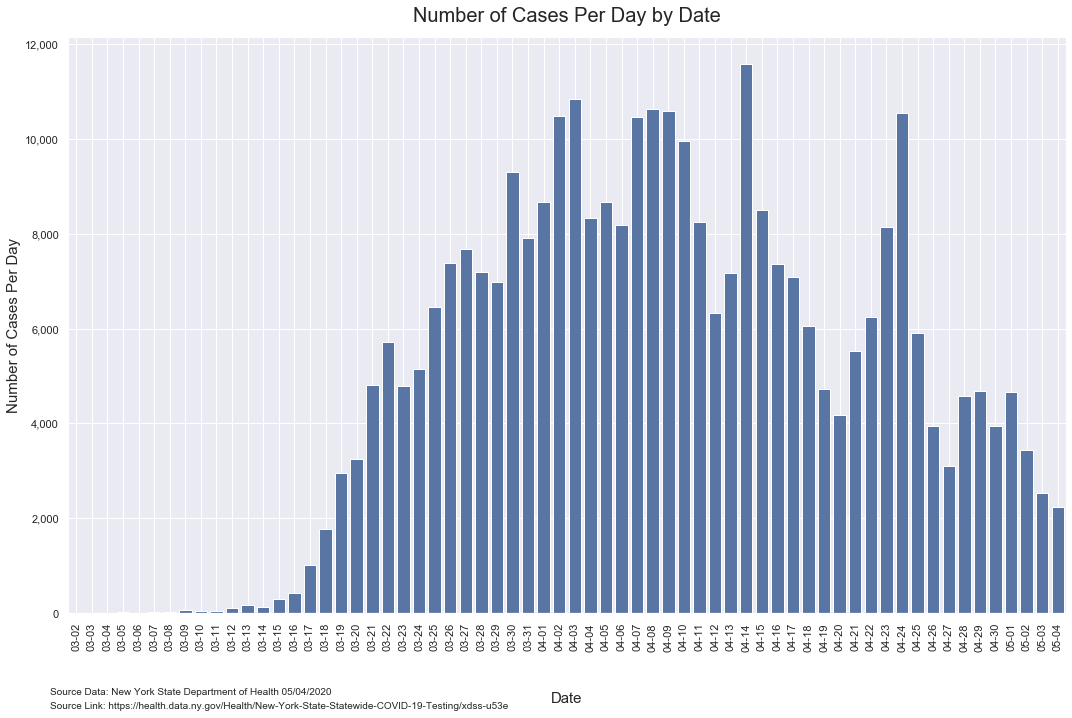

In [26]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.barplot(x="NewDate", 
            y="New Positives",
            color="C0",
            data=epi_curve)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 40

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.xticks(rotation=90)

#ax1.legend_.remove()
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Number of Cases Per Day', fontsize=15)
plt.title('Number of Cases Per Day by Date', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()

In [27]:
epi_curve['3_day_rolling_average'] = epi_curve['New Positives'].rolling(3).mean()

In [28]:
epi_curve

Test Date  New Positives NewDate  3_day_rolling_average
0  2020-03-02              1   03-02                    NaN
1  2020-03-03              0   03-03                    NaN
2  2020-03-04              2   03-04               1.000000
3  2020-03-05             22   03-05               8.000000
4  2020-03-06             11   03-06              11.666667
..        ...            ...     ...                    ...
59 2020-04-30           3942   04-30            4402.666667
60 2020-05-01           4663   05-01            4428.666667
61 2020-05-02           3438   05-02            4014.333333
62 2020-05-03           2538   05-03            3546.333333
63 2020-05-04           2239   05-04            2738.333333

[64 rows x 4 columns]

In [29]:
epi_curve['3_day_rolling_average'].fillna(0, inplace=True)

In [30]:
epi_curve.head()

Test Date  New Positives NewDate  3_day_rolling_average
0 2020-03-02              1   03-02               0.000000
1 2020-03-03              0   03-03               0.000000
2 2020-03-04              2   03-04               1.000000
3 2020-03-05             22   03-05               8.000000
4 2020-03-06             11   03-06              11.666667

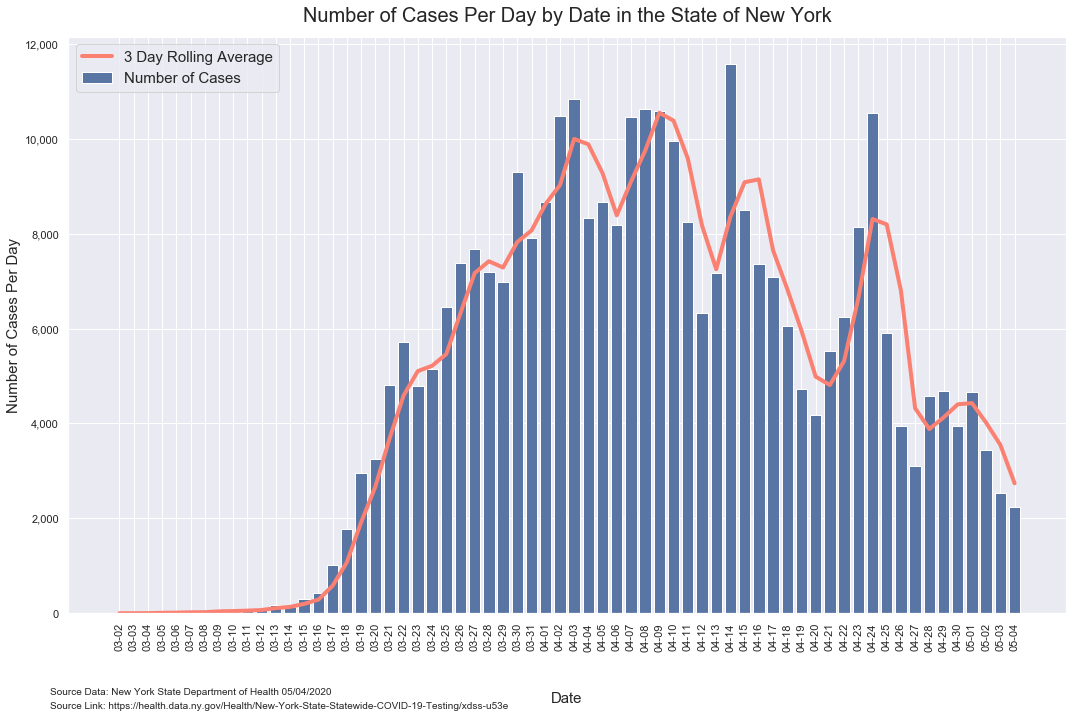

In [31]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.barplot(x="NewDate", 
            y="New Positives",
            color="C0",
            data=epi_curve,
            label = 'Number of Cases')

sns.lineplot(x="NewDate", 
            y="3_day_rolling_average",
            color="salmon",
            data=epi_curve, 
            linewidth=4,
            label = '3 Day Rolling Average')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('D'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 40

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.xticks(rotation=90)

leg = ax1.legend(loc='upper left', fontsize=15)

ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Number of Cases Per Day', fontsize=15)
plt.title('Number of Cases Per Day by Date in the State of New York', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/epi_curve')

In [32]:
covid_19_nys_data.head()

Test Date       County  New Positives  Cumulative Number of Positives  \
0 2020-05-04       Albany              7                            1294   
1 2020-05-04     Allegany              0                              35   
2 2020-05-04        Bronx            253                           39476   
3 2020-05-04       Broome              4                             338   
4 2020-05-04  Cattaraugus              0                              53   

   Total Number of Tests Performed  Cumulative Number of Tests Performed  
0                              130                                 12084  
1                               31                                   637  
2                             2001                                103476  
3                              180                                  3533  
4                               14                                  1142

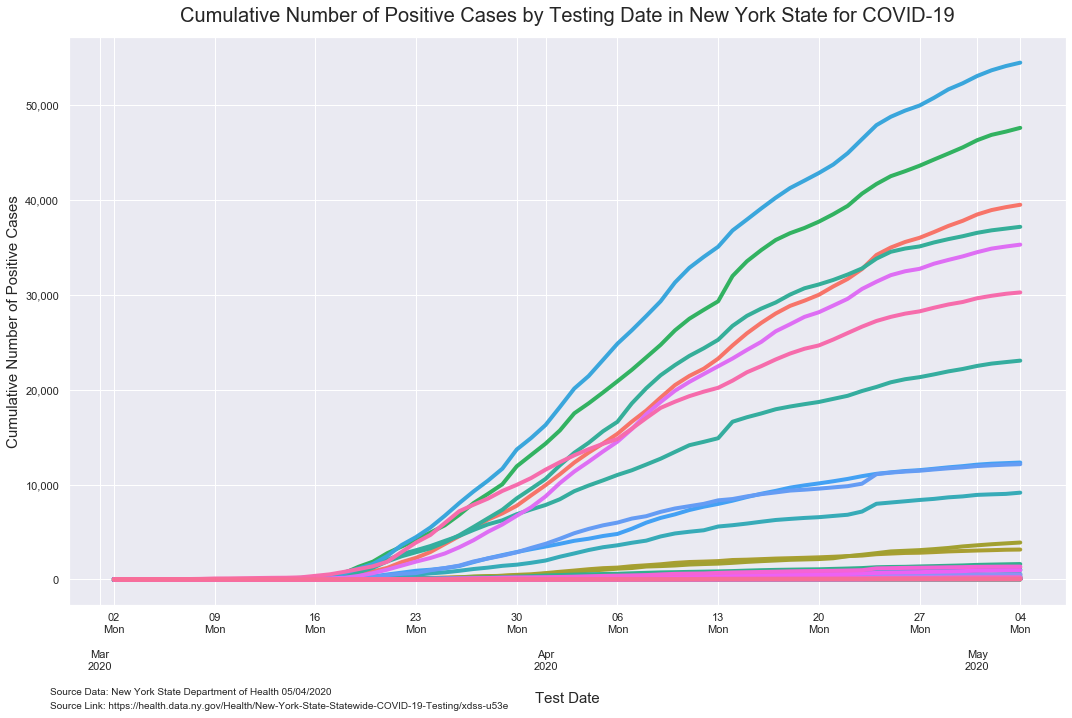

In [33]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             hue="County",
             data=covid_19_nys_data, linewidth=4)

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Testing Date in New York State for COVID-19', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-by-county')

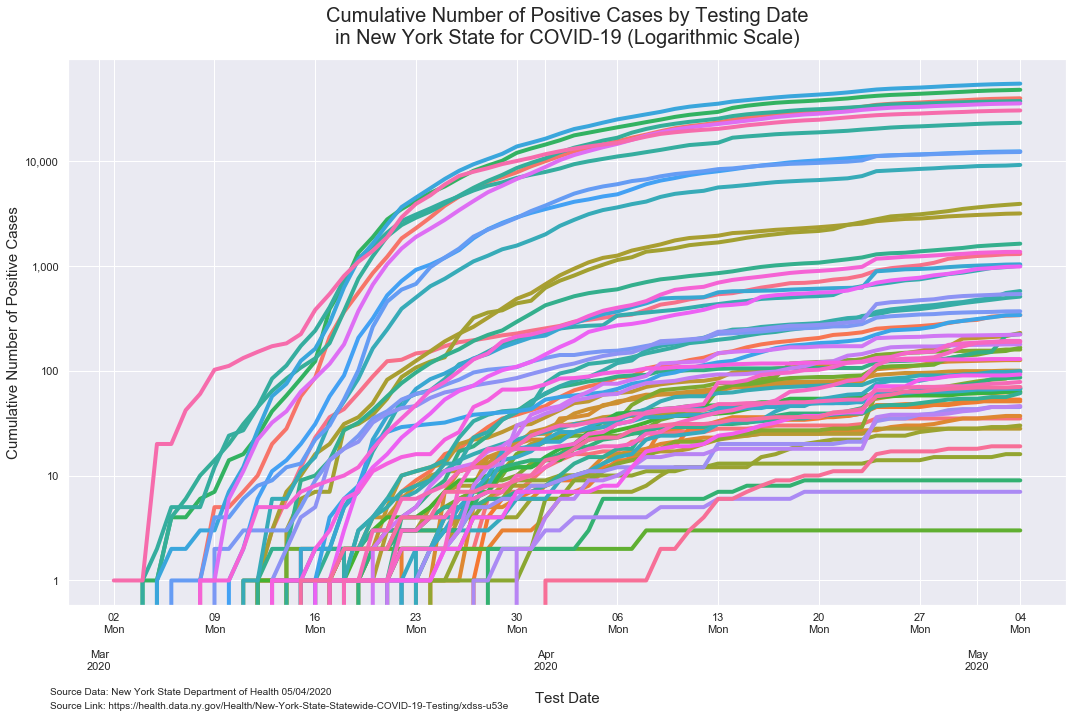

In [34]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             hue="County",
             data=covid_19_nys_data, linewidth=4)
ax1.set_yscale('log')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Testing Date\nin New York State for COVID-19 (Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-by-county-log')

In [35]:
drop_duplicates = covid_19_nys_data.sort_values(by="Cumulative Number of Positives", ascending=False).drop_duplicates(
                                                    subset ="County", keep = 'first')
top_10 = drop_duplicates[0:10]
top10_list = list(top_10['County'])
top_10  = covid_19_nys_data.loc[covid_19_nys_data['County'].isin(top10_list)]

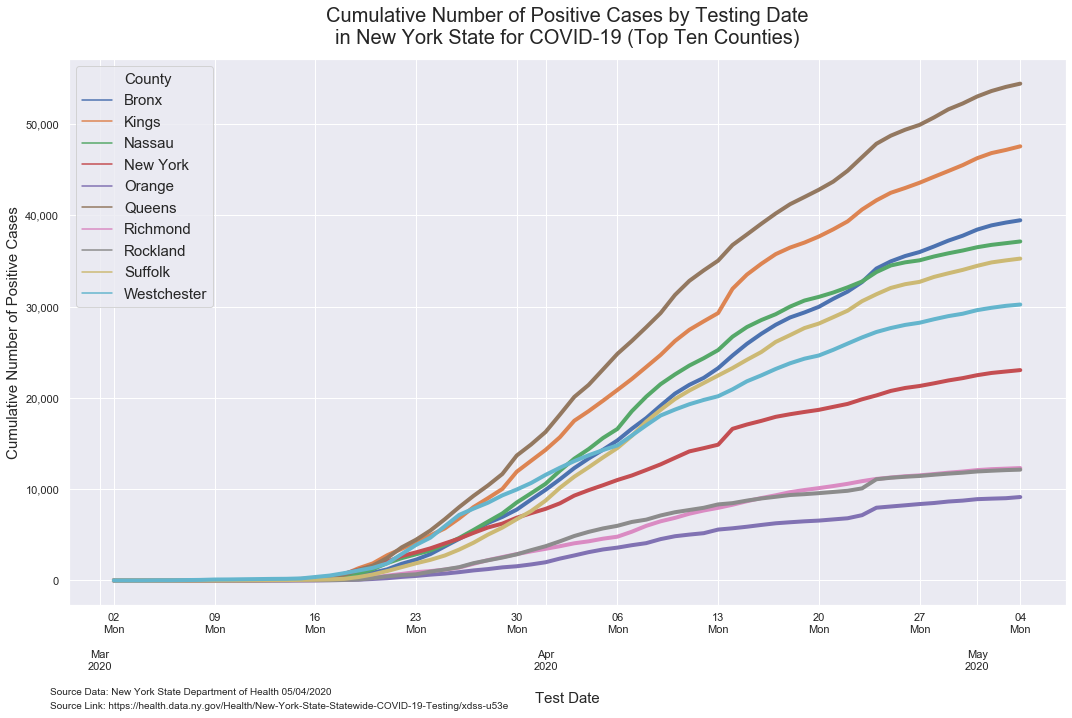

In [36]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             hue="County",
             data=top_10, linewidth=4)

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(fontsize=15)
ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Testing Date\nin New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-by-county-top-10')

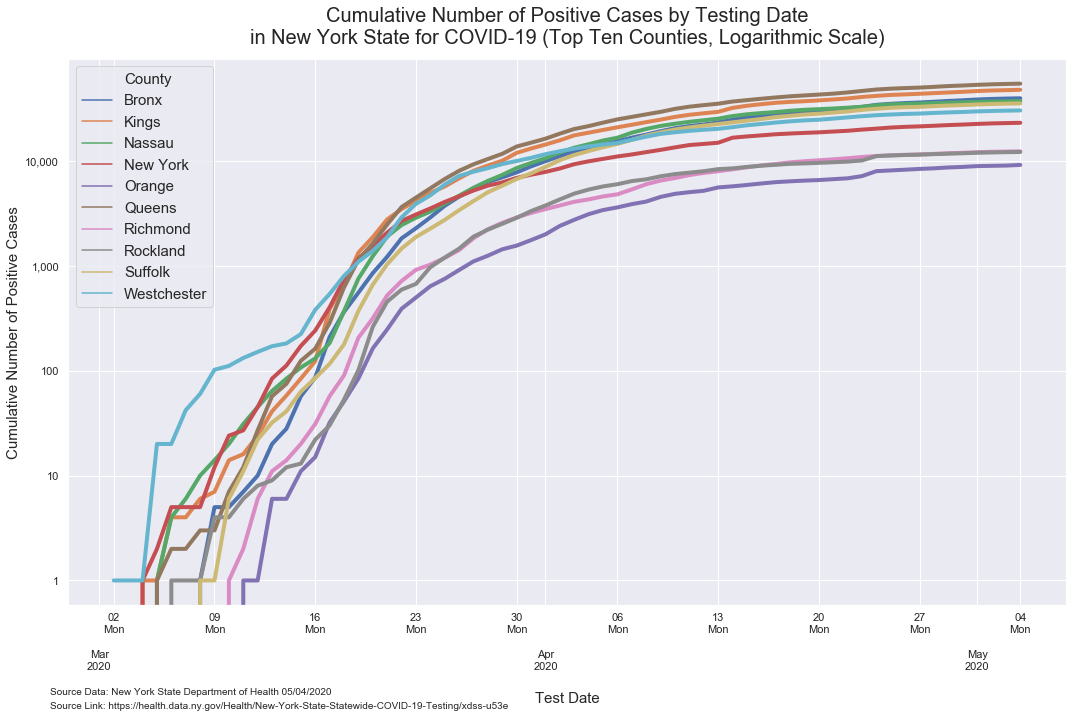

In [37]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             hue="County",
             data=top_10, linewidth=4)
ax1.set_yscale('log')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(fontsize=15)
ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Testing Date\nin New York State for COVID-19 (Top Ten Counties, Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-by-county-top-10-log')

In [38]:
from_ten_cases = covid_19_nys_data.loc[covid_19_nys_data['Cumulative Number of Positives'] >= 10]

In [39]:
from_ten_cases = from_ten_cases.sort_values(by=['Test Date', 'Cumulative Number of Positives'], ascending=[True, True], ).drop_duplicates(subset ="County", keep = 'first').reset_index(drop=True)

In [40]:
from_ten_cases = from_ten_cases[['County', 'Test Date']]
from_ten_cases.rename(columns={'Test Date': 'ten_cases_date'}, inplace=True)

In [41]:
from_ten_cases

County ten_cases_date
0    Westchester     2020-03-05
1         Nassau     2020-03-08
2       New York     2020-03-09
3          Kings     2020-03-10
4        Suffolk     2020-03-11
5         Queens     2020-03-11
6          Bronx     2020-03-12
7       Richmond     2020-03-13
8       Rockland     2020-03-14
9       Dutchess     2020-03-15
10        Orange     2020-03-15
11        Albany     2020-03-15
12        Monroe     2020-03-16
13      Saratoga     2020-03-17
14   Schenectady     2020-03-17
15        Ulster     2020-03-18
16          Erie     2020-03-18
17      Tompkins     2020-03-20
18      Sullivan     2020-03-20
19      Onondaga     2020-03-20
20    Rensselaer     2020-03-20
21        Putnam     2020-03-20
22      Columbia     2020-03-22
23       Niagara     2020-03-22
24       Clinton     2020-03-24
25        Broome     2020-03-24
26       Ontario     2020-03-25
27       Steuben     2020-03-25
28        Oneida     2020-03-25
29       Chemung     2020-03-26
30         Wayne     2020-03-26
31       Madison     2020-03-26
32        Warren     2020-03-27
33      Herkimer     2020-03-28
34    Livingston     2020-03-28
35        Otsego     2020-03-28
36  St. Lawrence     2020-03-28
37      Chenango     2020-03-28
38        Greene     2020-03-29
39      Delaware     2020-03-29
40     Jefferson     2020-03-29
41        Oswego     2020-03-29
42       Genesee     2020-03-30
43    Washington     2020-03-30
44       Wyoming     2020-03-31
45      Allegany     2020-04-01
46      Cortland     2020-04-02
47      Franklin     2020-04-02
48    Montgomery     2020-04-02
49    Chautauqua     2020-04-03
50       Orleans     2020-04-03
51     Schoharie     2020-04-03
52   Cattaraugus     2020-04-04
53        Cayuga     2020-04-05
54        Fulton     2020-04-05
55        Seneca     2020-04-06
56         Tioga     2020-04-07
57         Essex     2020-04-09
58         Yates     2020-04-19

In [42]:
from_ten_cases = covid_19_nys_data.merge(from_ten_cases, left_on='County', right_on='County')

In [43]:
from_ten_cases = from_ten_cases.loc[from_ten_cases['Cumulative Number of Positives'] >= 10]

In [44]:
from_ten_cases

Test Date  County  New Positives  Cumulative Number of Positives  \
0    2020-05-04  Albany              7                            1294   
1    2020-05-03  Albany             29                            1287   
2    2020-05-02  Albany             20                            1258   
3    2020-05-01  Albany             34                            1238   
4    2020-04-30  Albany             39                            1204   
...         ...     ...            ...                             ...   
3723 2020-04-23   Yates              0                              11   
3724 2020-04-22   Yates              0                              11   
3725 2020-04-21   Yates              1                              11   
3726 2020-04-20   Yates              0                              10   
3727 2020-04-19   Yates              1                              10   

      Total Number of Tests Performed  Cumulative Number of Tests Performed  \
0                                 130                                 12084   
1                                 391                                 11954   
2                                 441                                 11563   
3                                 434                                 11122   
4                                 378                                 10688   
...                               ...                                   ...   
3723                                5                                   193   
3724                                8                                   188   
3725                                1                                   180   
3726                                1                                   179   
3727                               13                                   178   

     ten_cases_date  
0        2020-03-15  
1        2020-03-15  
2        2020-03-15  
3        2020-03-15  
4        2020-03-15  
...             ...  
3723     2020-04-19  
3724     2020-04-19  
3725     2020-04-19  
3726     2020-04-19  
3727     2020-04-19  

[2446 rows x 7 columns]

In [45]:
from_ten_cases['days_from_10_cases'] = (from_ten_cases['Test Date'] - 
                                       from_ten_cases['ten_cases_date']).dt.days

In [46]:
from_ten_cases

Test Date  County  New Positives  Cumulative Number of Positives  \
0    2020-05-04  Albany              7                            1294   
1    2020-05-03  Albany             29                            1287   
2    2020-05-02  Albany             20                            1258   
3    2020-05-01  Albany             34                            1238   
4    2020-04-30  Albany             39                            1204   
...         ...     ...            ...                             ...   
3723 2020-04-23   Yates              0                              11   
3724 2020-04-22   Yates              0                              11   
3725 2020-04-21   Yates              1                              11   
3726 2020-04-20   Yates              0                              10   
3727 2020-04-19   Yates              1                              10   

      Total Number of Tests Performed  Cumulative Number of Tests Performed  \
0                                 130                                 12084   
1                                 391                                 11954   
2                                 441                                 11563   
3                                 434                                 11122   
4                                 378                                 10688   
...                               ...                                   ...   
3723                                5                                   193   
3724                                8                                   188   
3725                                1                                   180   
3726                                1                                   179   
3727                               13                                   178   

     ten_cases_date  days_from_10_cases  
0        2020-03-15                  50  
1        2020-03-15                  49  
2        2020-03-15                  48  
3        2020-03-15                  47  
4        2020-03-15                  46  
...             ...                 ...  
3723     2020-04-19                   4  
3724     2020-04-19                   3  
3725     2020-04-19                   2  
3726     2020-04-19                   1  
3727     2020-04-19                   0  

[2446 rows x 8 columns]

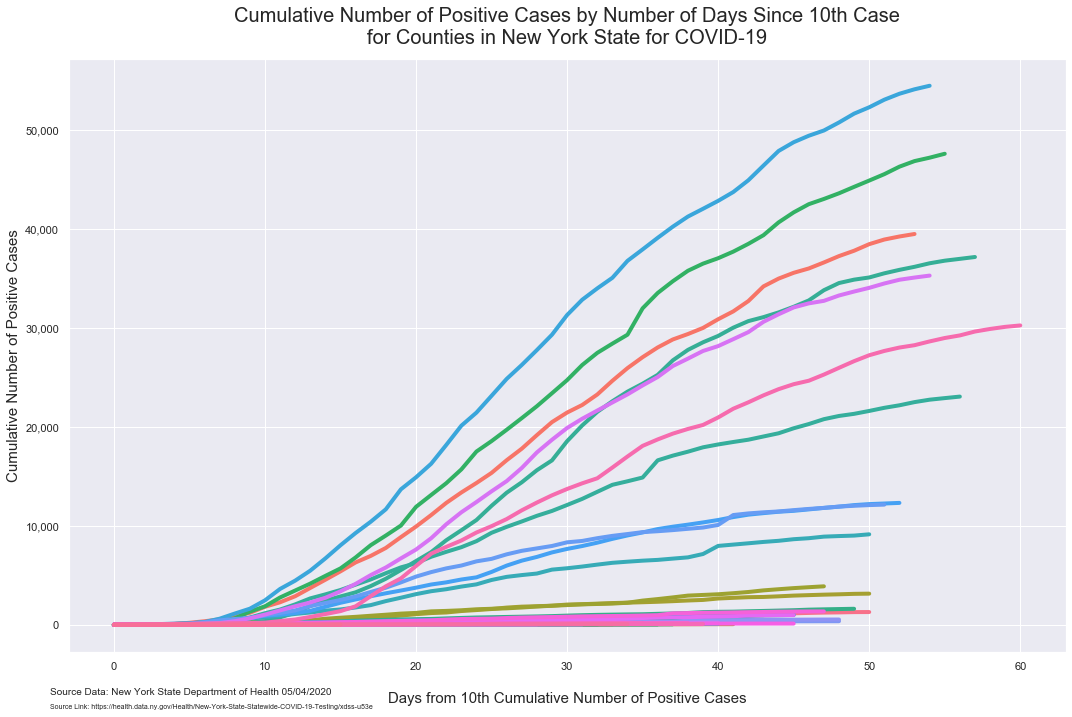

In [47]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="Cumulative Number of Positives",
             hue="County",
             data=from_ten_cases, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Days from 10th Cumulative Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Number of Days Since 10th Case\nfor Counties in New York State for COVID-19', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county')

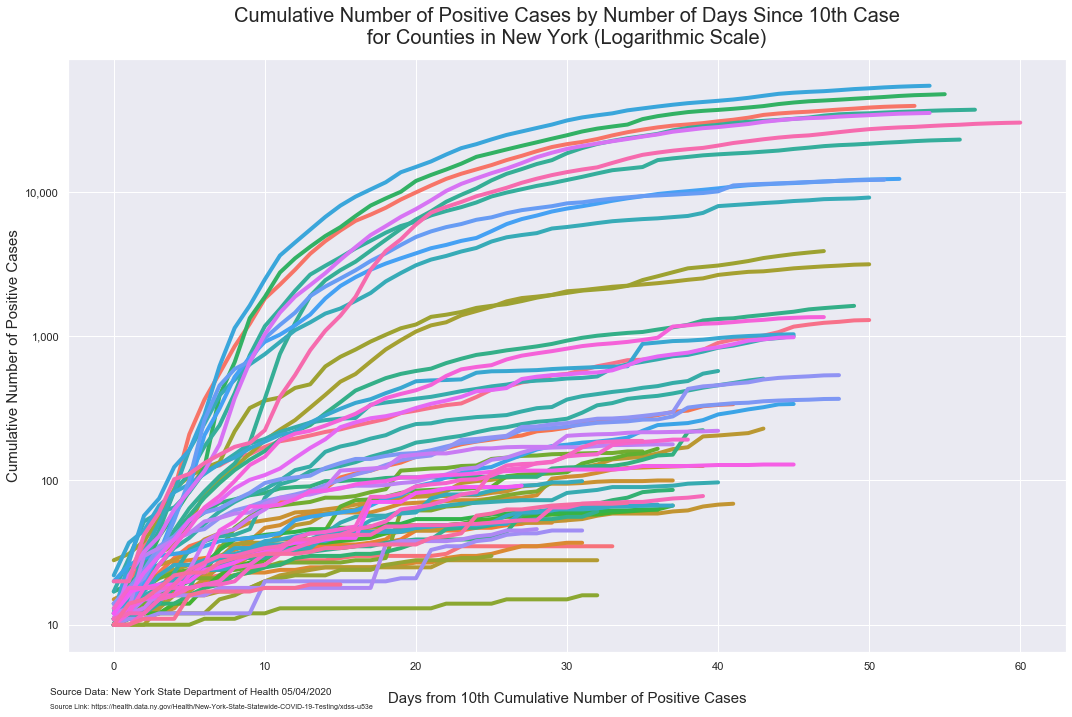

In [48]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="Cumulative Number of Positives",
             hue="County",
             data=from_ten_cases, linewidth=4)
ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Days from 10th Cumulative Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Number of Days Since 10th Case\nfor Counties in New York (Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-log')

In [49]:
top10_list = list(top_10['County'])

from_ten_cases_top_10  = from_ten_cases.loc[from_ten_cases['County'].isin(top10_list)]

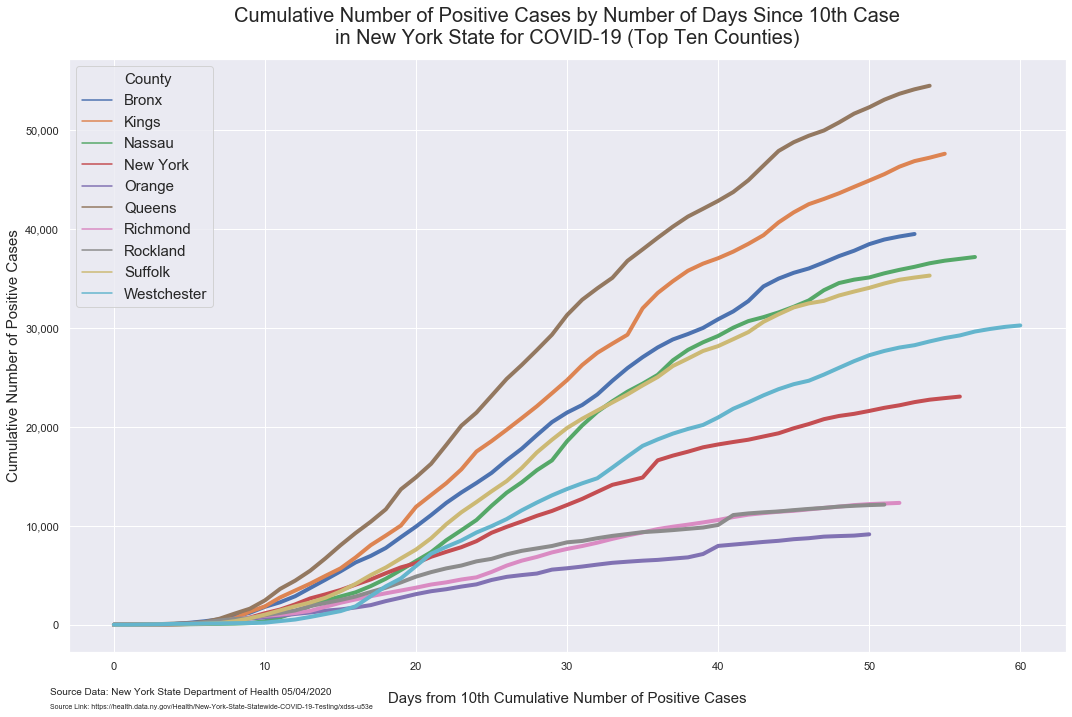

In [50]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="Cumulative Number of Positives",
             hue="County",
             data=from_ten_cases_top_10, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Cumulative Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10')

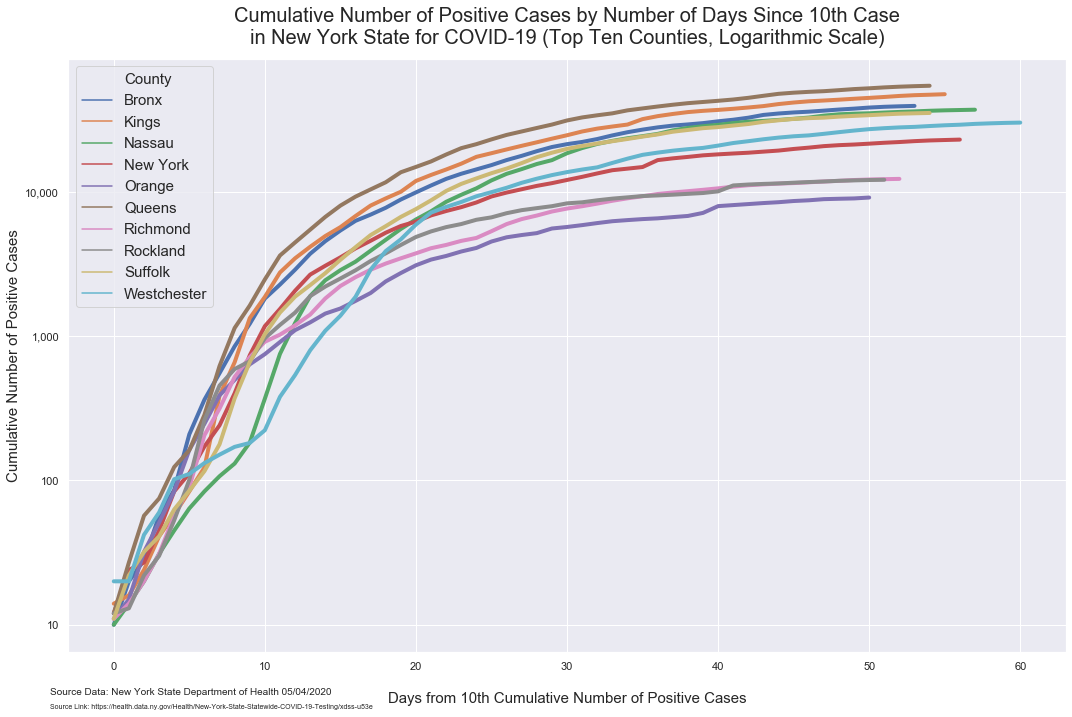

In [51]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="Cumulative Number of Positives",
             hue="County",
             data=from_ten_cases_top_10, linewidth=4)
ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Cumulative Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties, Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10-log')

In [52]:
from_ten_cases_top_10.head()

Test Date County  New Positives  Cumulative Number of Positives  \
128 2020-05-04  Bronx            253                           39476   
129 2020-05-03  Bronx            307                           39223   
130 2020-05-02  Bronx            466                           38916   
131 2020-05-01  Bronx            665                           38450   
132 2020-04-30  Bronx            541                           37785   

     Total Number of Tests Performed  Cumulative Number of Tests Performed  \
128                             2001                                103476   
129                             1869                                101475   
130                             2857                                 99606   
131                             3694                                 96749   
132                             2824                                 93055   

    ten_cases_date  days_from_10_cases  
128     2020-03-12                  53  
129     2020-03-12                  52  
130     2020-03-12                  51  
131     2020-03-12                  50  
132     2020-03-12                  49

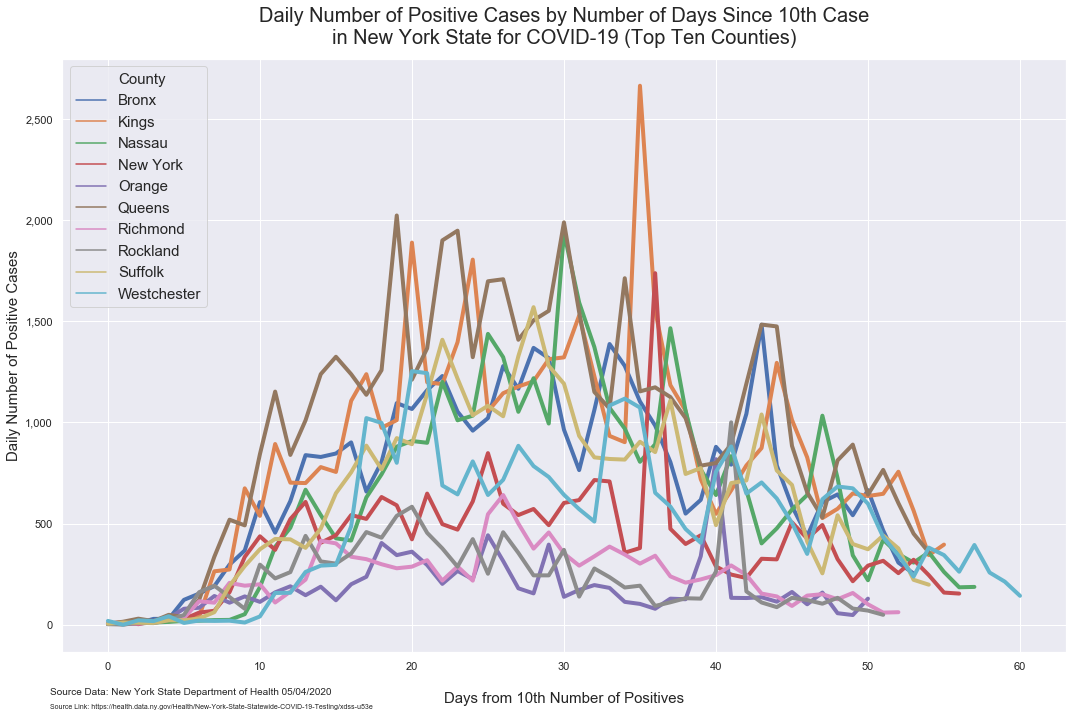

In [53]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="New Positives",
             hue="County",
             data=from_ten_cases_top_10, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positives', fontsize=15)
ax1.set_ylabel('Daily Number of Positive Cases', fontsize=15)
plt.title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10-daily')

In [54]:
from_ten_cases_top_10['New Positives'].loc[from_ten_cases_top_10['New Positives'] <= 0]

3643    0
Name: New Positives, dtype: int64

In [55]:
temp_fill_zeros = from_ten_cases_top_10.sort_values(by=['County', 'Test Date','Cumulative Number of Positives'], 
                                                 ascending=[True, True, True])

temp_fill_zeros['New Positives'].loc[from_ten_cases_top_10['New Positives'] <= 0] = 1

temp_fill_zeros

/Users/geribauer/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Test Date       County  New Positives  Cumulative Number of Positives  \
181  2020-03-12        Bronx              3                              10   
180  2020-03-13        Bronx             10                              20   
179  2020-03-14        Bronx              8                              28   
178  2020-03-15        Bronx             29                              57   
177  2020-03-16        Bronx             29                              86   
...         ...          ...            ...                             ...   
3588 2020-04-30  Westchester            262                           29232   
3587 2020-05-01  Westchester            394                           29626   
3586 2020-05-02  Westchester            258                           29884   
3585 2020-05-03  Westchester            213                           30097   
3584 2020-05-04  Westchester            143                           30240   

      Total Number of Tests Performed  Cumulative Number of Tests Performed  \
181                                36                                   190   
180                                99                                   289   
179                                80                                   369   
178                               116                                   485   
177                               151                                   636   
...                               ...                                   ...   
3588                             1613                                 94442   
3587                             2359                                 96801   
3586                             1809                                 98610   
3585                             1662                                100272   
3584                             1225                                101497   

     ten_cases_date  days_from_10_cases  
181      2020-03-12                   0  
180      2020-03-12                   1  
179      2020-03-12                   2  
178      2020-03-12                   3  
177      2020-03-12                   4  
...             ...                 ...  
3588     2020-03-05                  56  
3587     2020-03-05                  57  
3586     2020-03-05                  58  
3585     2020-03-05                  59  
3584     2020-03-05                  60  

[552 rows x 8 columns]

In [56]:
temp_fill_zeros[['County', 'New Positives', 'days_from_10_cases']].loc[from_ten_cases_top_10['County'] == 'Westchester']

County  New Positives  days_from_10_cases
3644  Westchester             19                   0
3643  Westchester              1                   1
3642  Westchester             22                   2
3641  Westchester             18                   3
3640  Westchester             42                   4
...           ...            ...                 ...
3588  Westchester            262                  56
3587  Westchester            394                  57
3586  Westchester            258                  58
3585  Westchester            213                  59
3584  Westchester            143                  60

[61 rows x 3 columns]

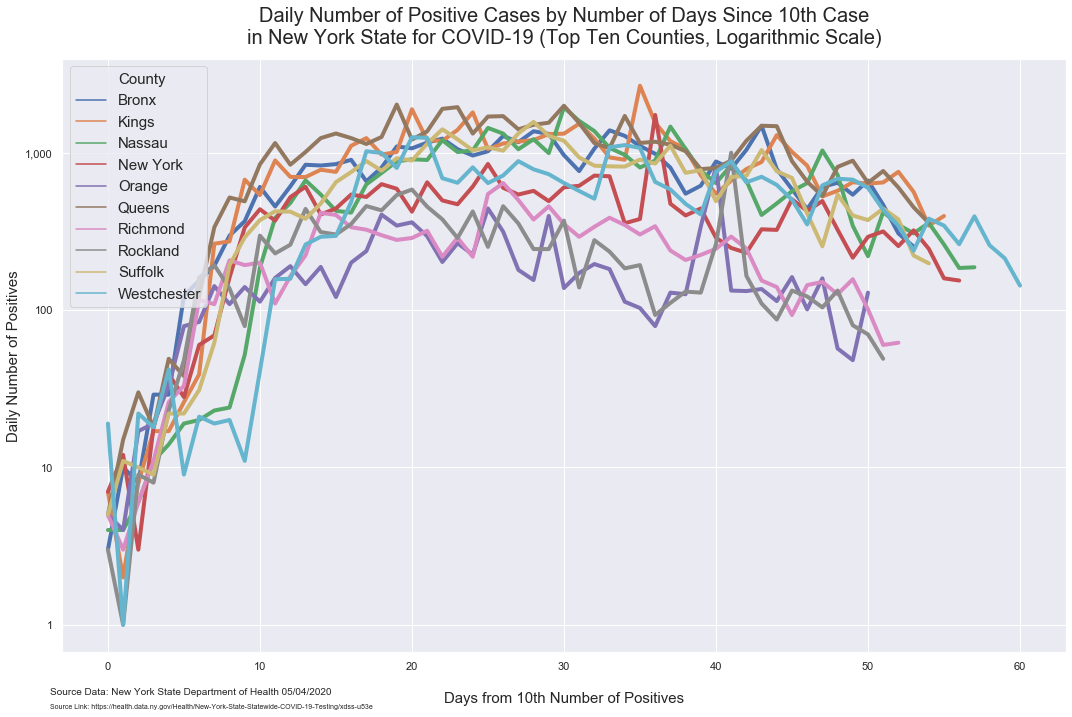

In [57]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="New Positives",
             hue="County",
             data=temp_fill_zeros, linewidth=4)
ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positives', fontsize=15)
ax1.set_ylabel('Daily Number of Positives', fontsize=15)
plt.title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties, Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10-daily-log')

In [58]:
from_ten_cases_top_10_weekly = from_ten_cases_top_10.sort_values(by=['County', 'Test Date','Cumulative Number of Positives'], 
                                                                ascending=[True, True, True])

In [59]:
from_ten_cases_top_10_weekly = from_ten_cases_top_10_weekly.set_index('Test Date').groupby('County').resample('W').agg({'days_from_10_cases': 
                                                                    np.max, 'New Positives': np.mean})

In [60]:
from_ten_cases_top_10_weekly.reset_index(inplace=True)
from_ten_cases_top_10_weekly.rename(columns={'New Positives': 'New Positives Weekly Average'}, inplace=True)

In [61]:
from_ten_cases_top_10_weekly

County  Test Date  days_from_10_cases  New Positives Weekly Average
0         Bronx 2020-03-15                   3                     12.500000
1         Bronx 2020-03-22                  10                    252.428571
2         Bronx 2020-03-29                  17                    734.000000
3         Bronx 2020-04-05                  24                   1052.142857
4         Bronx 2020-04-12                  31                   1125.428571
..          ...        ...                 ...                           ...
87  Westchester 2020-04-12                  38                    784.571429
88  Westchester 2020-04-19                  45                    645.714286
89  Westchester 2020-04-26                  52                    528.714286
90  Westchester 2020-05-03                  59                    298.571429
91  Westchester 2020-05-10                  60                    143.000000

[92 rows x 4 columns]

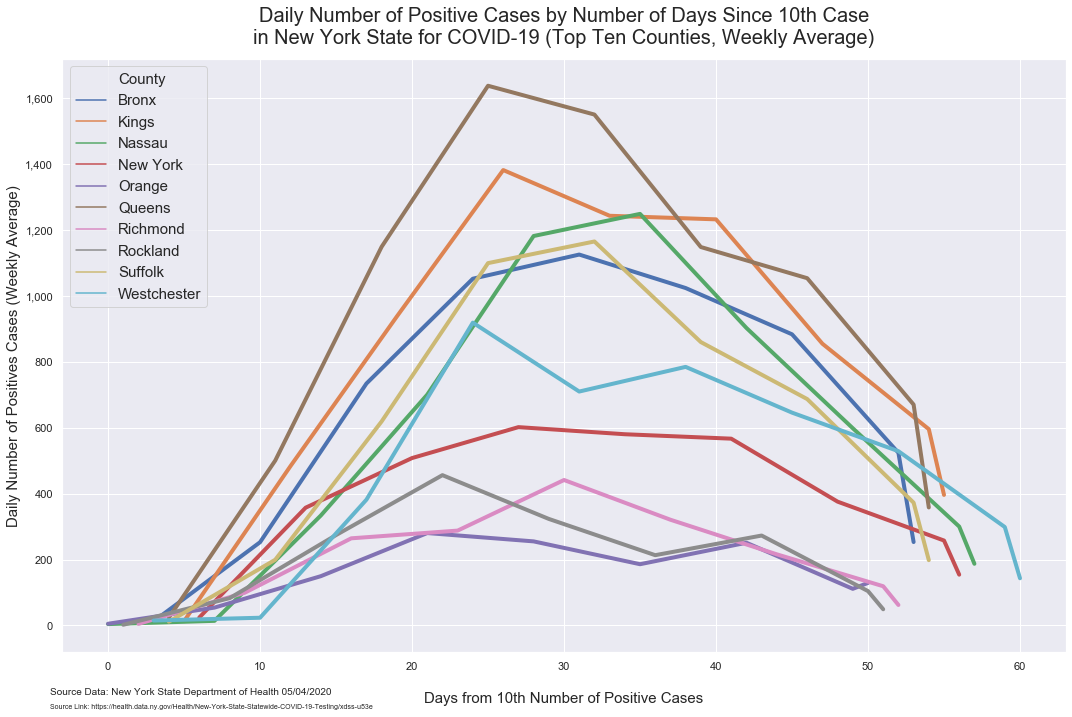

In [62]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="New Positives Weekly Average",
             hue="County",
             data=from_ten_cases_top_10_weekly, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Daily Number of Positives Cases (Weekly Average)', fontsize=15)
plt.title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties, Weekly Average)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10-weekly')

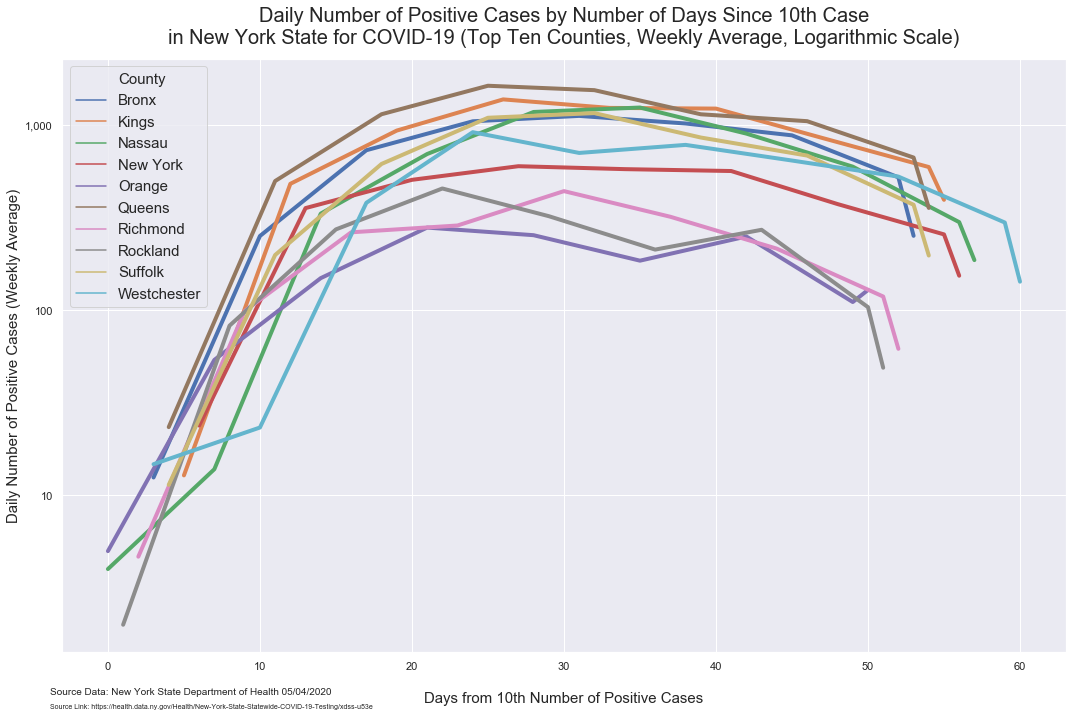

In [63]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="New Positives Weekly Average",
             hue="County",
             data=from_ten_cases_top_10_weekly, linewidth=4)
ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Daily Number of Positive Cases (Weekly Average)', fontsize=15)
plt.title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties, Weekly Average, Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10-weekly-log')

# Trajectory Plots

In [64]:
covid_19_nys_data.head()

Test Date       County  New Positives  Cumulative Number of Positives  \
0 2020-05-04       Albany              7                            1294   
1 2020-05-04     Allegany              0                              35   
2 2020-05-04        Bronx            253                           39476   
3 2020-05-04       Broome              4                             338   
4 2020-05-04  Cattaraugus              0                              53   

   Total Number of Tests Performed  Cumulative Number of Tests Performed  
0                              130                                 12084  
1                               31                                   637  
2                             2001                                103476  
3                              180                                  3533  
4                               14                                  1142

In [65]:
nys_trajectory = covid_19_nys_data.groupby('Test Date')['Cumulative Number of Positives'].sum().reset_index()

nys_trajectory.set_index('Test Date', drop=False, inplace=True)

nys_trajectory.index = pd.to_datetime(nys_trajectory.index, infer_datetime_format=True)

In [66]:
nys_trajectory['daily_cases'] = nys_trajectory['Cumulative Number of Positives'].diff()

In [67]:
nys_trajectory.head()

Test Date  Cumulative Number of Positives  daily_cases
Test Date                                                         
2020-03-02 2020-03-02                               1          NaN
2020-03-03 2020-03-03                               1          0.0
2020-03-04 2020-03-04                               3          2.0
2020-03-05 2020-03-05                              25         22.0
2020-03-06 2020-03-06                              36         11.0

In [68]:
nys_trajectory['daily_cases'].loc[nys_trajectory.daily_cases < 0] = nys_trajectory['Cumulative Number of Positives']

nys_trajectory['daily_cases'].loc[nys_trajectory.daily_cases.isnull()] = nys_trajectory['Cumulative Number of Positives']

In [69]:
nys_trajectory.head()

Test Date  Cumulative Number of Positives  daily_cases
Test Date                                                         
2020-03-02 2020-03-02                               1          1.0
2020-03-03 2020-03-03                               1          0.0
2020-03-04 2020-03-04                               3          2.0
2020-03-05 2020-03-05                              25         22.0
2020-03-06 2020-03-06                              36         11.0

In [70]:
nys_trajectory = nys_trajectory.set_index('Test Date').resample('W').agg({'Cumulative Number of Positives': 
                                                                    np.max, 'daily_cases': np.mean})

In [71]:
nys_trajectory.reset_index(inplace=True)
nys_trajectory.rename(columns={'daily_cases': 'daily_cases_week_avg'}, inplace=True)

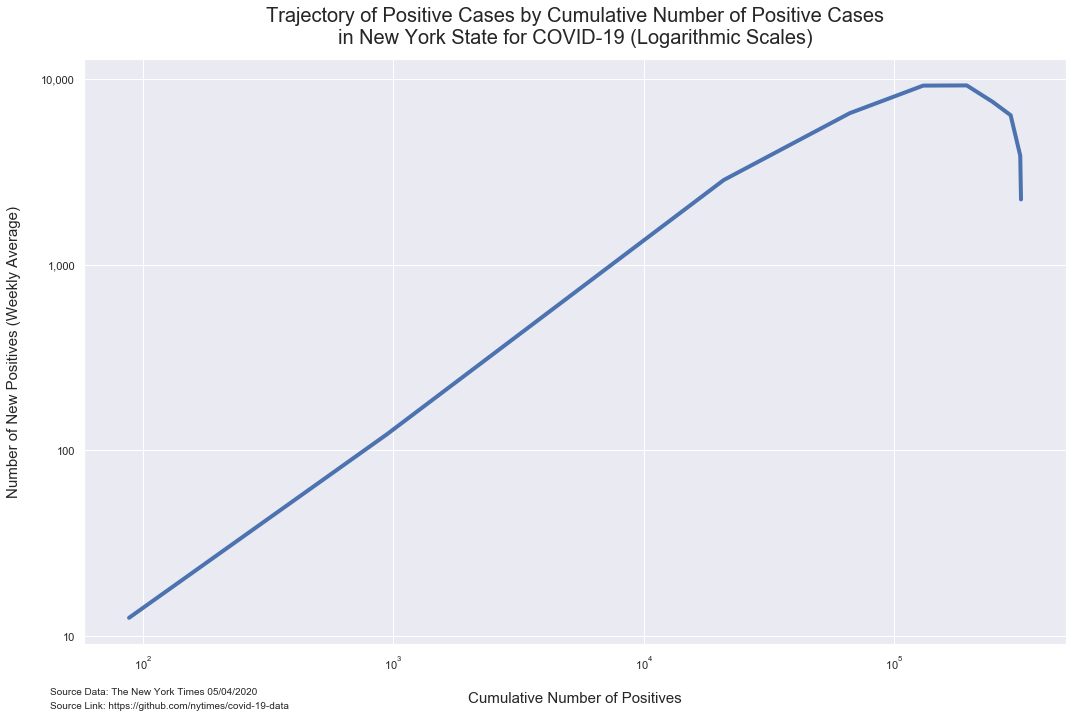

In [72]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="Cumulative Number of Positives", y="daily_cases_week_avg", data=nys_trajectory, linewidth=4)
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.set_xlabel('Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Number of New Positives (Weekly Average)', fontsize=15)
plt.title('Trajectory of Positive Cases by Cumulative Number of Positive Cases\nin New York State for COVID-19 (Logarithmic Scales)', 
          pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/trajectory-nys-log-log')

In [73]:
trajectory_plot = covid_19_nys_data.sort_values(by=['County', 'Test Date','Cumulative Number of Positives'], 
                                ascending=[True, True, True])

In [74]:
trajectory_plot.head()

Test Date  County  New Positives  Cumulative Number of Positives  \
3906 2020-03-02  Albany              0                               0   
3844 2020-03-03  Albany              0                               0   
3782 2020-03-04  Albany              0                               0   
3720 2020-03-05  Albany              0                               0   
3658 2020-03-06  Albany              0                               0   

      Total Number of Tests Performed  Cumulative Number of Tests Performed  
3906                                0                                     0  
3844                                0                                     0  
3782                                0                                     0  
3720                                3                                     3  
3658                                0                                     3

In [75]:
trajectory_plot = trajectory_plot.loc[trajectory_plot['Cumulative Number of Positives'] > 0]

In [76]:
trajectory_plot = trajectory_plot.set_index('Test Date').groupby('County').resample('W').agg({'Cumulative Number of Positives': np.max, 
                                                                                                     'New Positives': np.mean})


In [77]:
trajectory_plot[:50]

Cumulative Number of Positives  New Positives
County      Test Date                                                
Albany      2020-03-15                              12       3.000000
            2020-03-22                             127      16.428571
            2020-03-29                             217      12.857143
            2020-04-05                             319      14.571429
            2020-04-12                             499      25.714286
            2020-04-19                             687      26.857143
            2020-04-26                             979      41.714286
            2020-05-03                            1287      44.000000
            2020-05-10                            1294       7.000000
Allegany    2020-03-15                               2       2.000000
            2020-03-22                               2       0.000000
            2020-03-29                               7       0.714286
            2020-04-05                              17       1.428571
            2020-04-12                              26       1.285714
            2020-04-19                              30       0.571429
            2020-04-26                              35       0.714286
            2020-05-03                              35       0.000000
            2020-05-10                              35       0.000000
Bronx       2020-03-08                               1       1.000000
            2020-03-15                              57       8.000000
            2020-03-22                            1824     252.428571
            2020-03-29                            6962     734.000000
            2020-04-05                           14327    1052.142857
            2020-04-12                           22205    1125.428571
            2020-04-19                           29372    1023.857143
            2020-04-26                           35556     883.428571
            2020-05-03                           39223     523.857143
            2020-05-10                           39476     253.000000
Broome      2020-03-15                               1       0.250000
            2020-03-22                               7       0.857143
            2020-03-29                              35       4.000000
            2020-04-05                              76       5.857143
            2020-04-12                             133       8.142857
            2020-04-19                             199       9.428571
            2020-04-26                             261       8.857143
            2020-05-03                             334      10.428571
            2020-05-10                             338       4.000000
Cattaraugus 2020-03-29                               6       2.000000
            2020-04-05                              12       0.857143
            2020-04-12                              28       2.285714
            2020-04-19                              34       0.857143
            2020-04-26                              45       1.571429
            2020-05-03                              53       1.142857
            2020-05-10                              53       0.000000
Cayuga      2020-03-22                               2       2.000000
            2020-03-29                               3       0.142857
            2020-04-05                              11       1.142857
            2020-04-12                              30       2.714286
            2020-04-19                              36       0.857143
            2020-04-26                              48       1.714286

In [78]:
trajectory_plot.reset_index(inplace=True)

trajectory_plot.rename(columns={'New Positives': 'daily_cases_week_avg'}, inplace=True)

In [79]:
trajectory_plot.head()

County  Test Date  Cumulative Number of Positives  daily_cases_week_avg
0  Albany 2020-03-15                              12              3.000000
1  Albany 2020-03-22                             127             16.428571
2  Albany 2020-03-29                             217             12.857143
3  Albany 2020-04-05                             319             14.571429
4  Albany 2020-04-12                             499             25.714286

/Users/geribauer/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


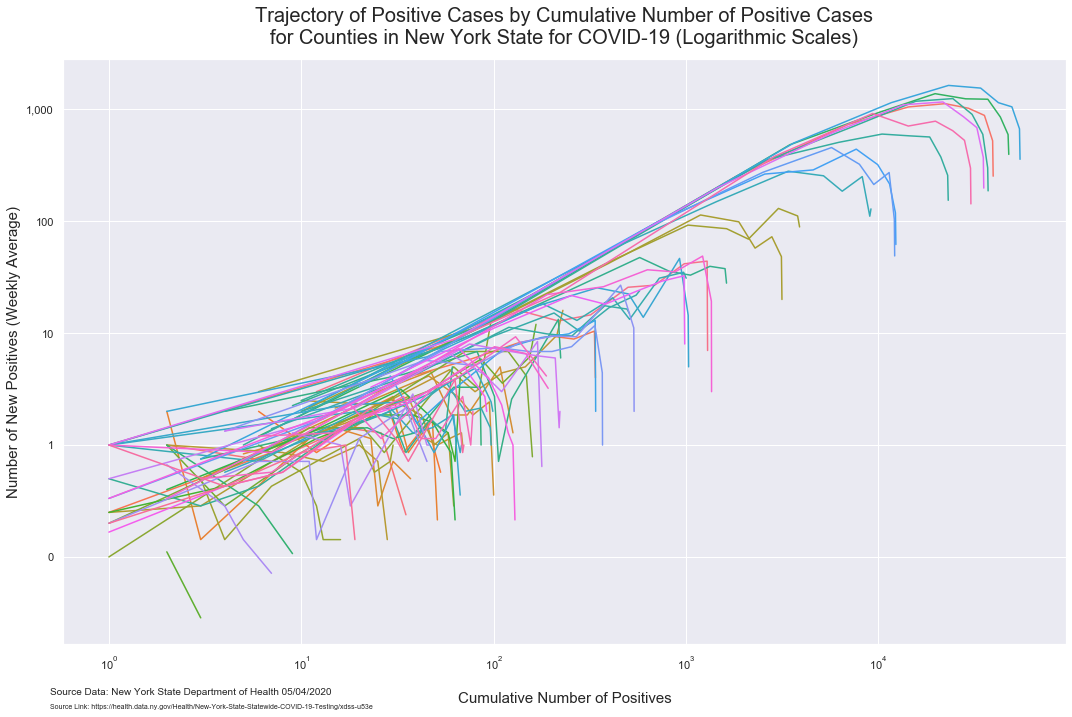

In [80]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Cumulative Number of Positives", y="daily_cases_week_avg",
             hue="County",
             data=trajectory_plot, ci=False)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5

ax1.legend_.remove()
ax1.set_xlabel('Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Number of New Positives (Weekly Average)', fontsize=15)
plt.title('Trajectory of Positive Cases by Cumulative Number of Positive Cases\nfor Counties in New York State for COVID-19 (Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/trajectory-nys-county-log-log')

In [81]:
trajectory_plot_scatter = trajectory_plot.sort_values(by=['Test Date', 'Cumulative Number of Positives'], 
                                              ascending=[False, False]).drop_duplicates(subset ="County", 
                                              keep = 'first').reset_index(drop=True)

In [82]:
trajectory_plot_scatter.tail()

County  Test Date  Cumulative Number of Positives  daily_cases_week_avg
57     Yates 2020-05-10                              19                   0.0
58  Franklin 2020-05-10                              16                   0.0
59     Lewis 2020-05-10                               9                   0.0
60  Schuyler 2020-05-10                               7                   0.0
61  Hamilton 2020-05-10                               3                   0.0

In [83]:
print(list(trajectory_plot_scatter.County))

['Queens', 'Kings', 'Bronx', 'Nassau', 'Suffolk', 'Westchester', 'New York', 'Richmond', 'Rockland', 'Orange', 'Erie', 'Dutchess', 'Monroe', 'Ulster', 'Albany', 'Putnam', 'Onondaga', 'Sullivan', 'Oneida', 'Schenectady', 'Niagara', 'Saratoga', 'Rensselaer', 'Broome', 'Columbia', 'Madison', 'Steuben', 'Warren', 'Washington', 'St. Lawrence', 'Greene', 'Genesee', 'Tompkins', 'Chemung', 'Chenango', 'Orleans', 'Fulton', 'Ontario', 'Tioga', 'Livingston', 'Wayne', 'Wyoming', 'Clinton', 'Oswego', 'Herkimer', 'Otsego', 'Jefferson', 'Delaware', 'Montgomery', 'Cattaraugus', 'Cayuga', 'Seneca', 'Schoharie', 'Chautauqua', 'Allegany', 'Essex', 'Cortland', 'Yates', 'Franklin', 'Lewis', 'Schuyler', 'Hamilton']


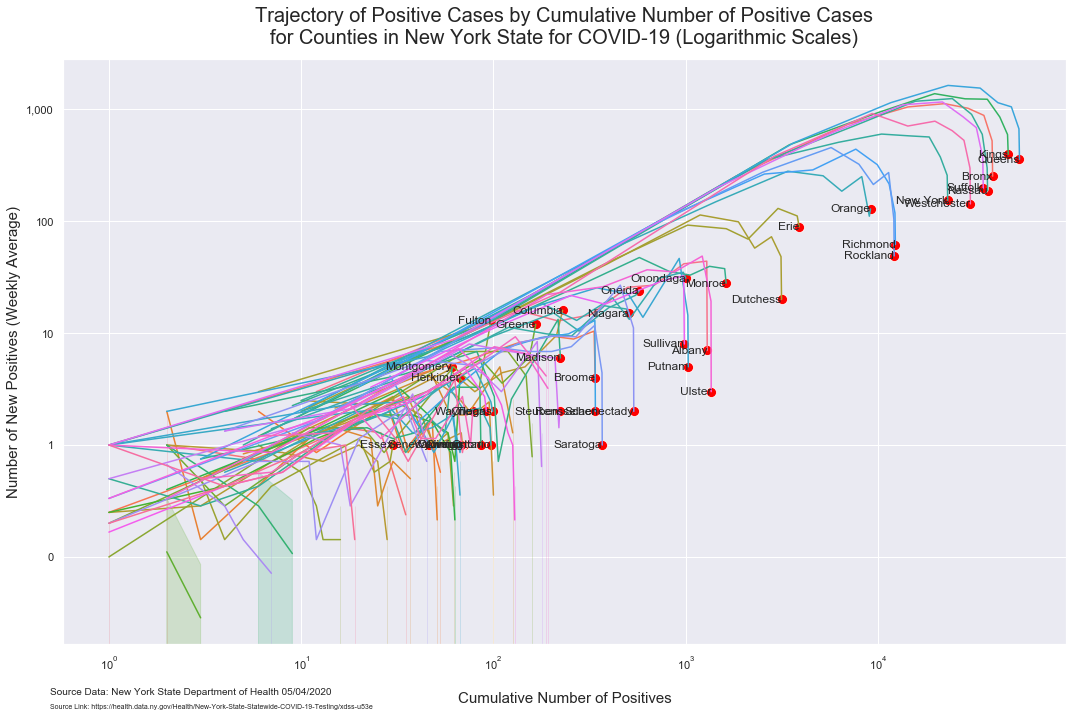

In [84]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Cumulative Number of Positives", y="daily_cases_week_avg",
             hue="County",
             data=trajectory_plot)

sns.scatterplot(x="Cumulative Number of Positives", y="daily_cases_week_avg", 
             data=trajectory_plot_scatter, s=100, ax=ax1, color='red')


x = trajectory_plot_scatter.daily_cases_week_avg
z = trajectory_plot_scatter['Cumulative Number of Positives']
n = trajectory_plot_scatter.County
for i, label in enumerate(n):
    ax1.annotate(label, (z[i], x[i]), fontsize=12,
                 horizontalalignment='right', va='center', clip_on=True)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5
#ax1.set_xbound(lower=100)

ax1.legend_.remove()
ax1.set_xlabel('Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Number of New Positives (Weekly Average)', fontsize=15)
plt.title('Trajectory of Positive Cases by Cumulative Number of Positive Cases\nfor Counties in New York State for COVID-19 (Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
#plt.savefig('figures/trajectory-nys-county-log-log-scatter')

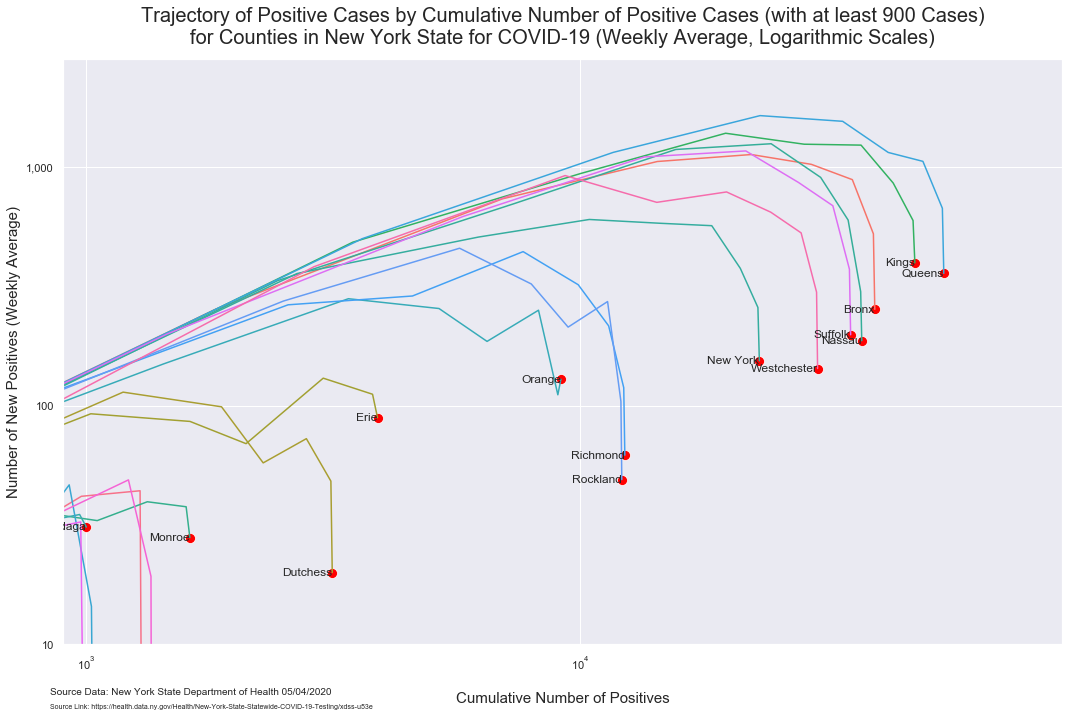

In [85]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Cumulative Number of Positives", y="daily_cases_week_avg",
             hue="County",
             data=trajectory_plot)

sns.scatterplot(x="Cumulative Number of Positives", y="daily_cases_week_avg", 
             data=trajectory_plot_scatter, s=100, ax=ax1, color='red')


x = trajectory_plot_scatter.daily_cases_week_avg
z = trajectory_plot_scatter['Cumulative Number of Positives']
n = trajectory_plot_scatter.County
for i, label in enumerate(n):
    ax1.annotate(label, (z[i], x[i]), fontsize=12,
                 horizontalalignment='right', va='center', clip_on=True)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5

plt.xlim(900)
plt.ylim(10)

ax1.legend_.remove()
ax1.set_xlabel('Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Number of New Positives (Weekly Average)', fontsize=15)
plt.title('Trajectory of Positive Cases by Cumulative Number of Positive Cases (with at least 900 Cases)\nfor Counties in New York State for COVID-19 (Weekly Average, Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/trajectory-nys-county-log-log-scatter-x-limit')

In [86]:
top10_list = list(top_10['County'])

trajectory_plot_top_10  = trajectory_plot.loc[trajectory_plot['County'].isin(top10_list)]

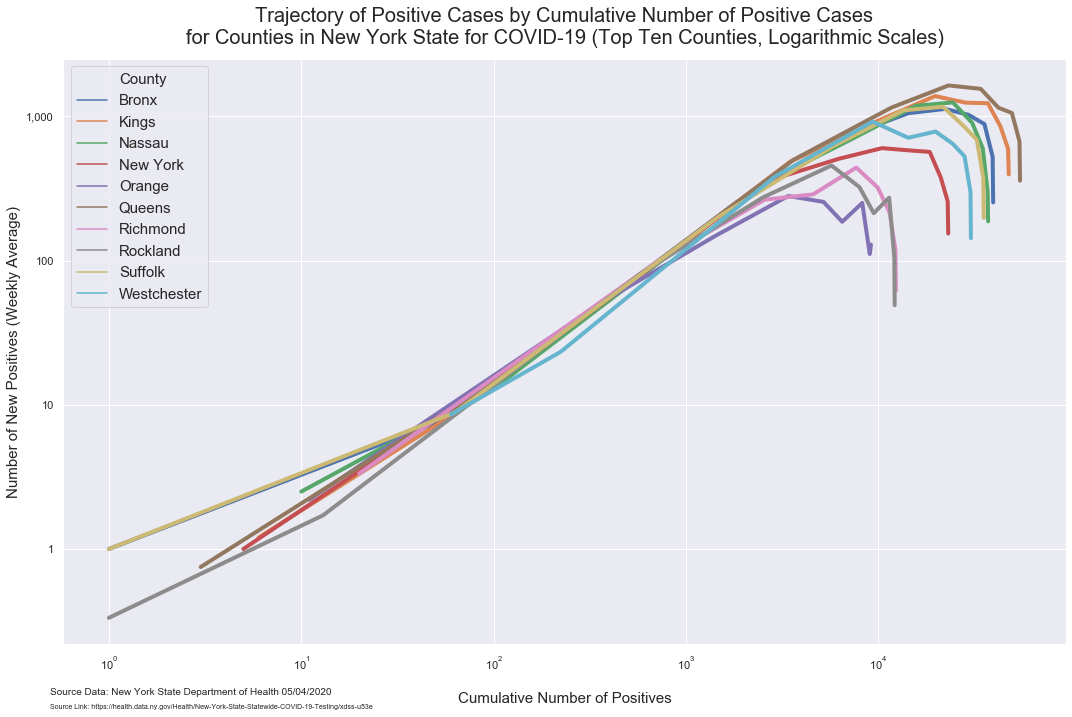

In [87]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Cumulative Number of Positives", y="daily_cases_week_avg",
             hue="County",
             data=trajectory_plot_top_10, linewidth=4)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5

ax1.legend(fontsize=15)
ax1.set_xlabel('Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Number of New Positives (Weekly Average)', fontsize=15)
plt.title('Trajectory of Positive Cases by Cumulative Number of Positive Cases\nfor Counties in New York State for COVID-19 (Top Ten Counties, Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/trajectory-nys-county-top-ten-log-log')

In [88]:
covid_19_nys_data_total = covid_19_nys_data.groupby('Test Date')['Cumulative Number of Positives'].sum().reset_index()

covid_19_nys_data_total.set_index('Test Date', drop=False, inplace=True)

covid_19_nys_data_total.index = pd.to_datetime(covid_19_nys_data_total.index, infer_datetime_format=True)

In [89]:
covid_19_nys_data_total.head(10)

Test Date  Cumulative Number of Positives
Test Date                                            
2020-03-02 2020-03-02                               1
2020-03-03 2020-03-03                               1
2020-03-04 2020-03-04                               3
2020-03-05 2020-03-05                              25
2020-03-06 2020-03-06                              36
2020-03-07 2020-03-07                              60
2020-03-08 2020-03-08                              88
2020-03-09 2020-03-09                             151
2020-03-10 2020-03-10                             195
2020-03-11 2020-03-11                             251

In [90]:
covid_19_nys_data_total.tail(10)

Test Date  Cumulative Number of Positives
Test Date                                            
2020-04-25 2020-04-25                          288045
2020-04-26 2020-04-26                          291996
2020-04-27 2020-04-27                          295106
2020-04-28 2020-04-28                          299691
2020-04-29 2020-04-29                          304372
2020-04-30 2020-04-30                          308314
2020-05-01 2020-05-01                          312977
2020-05-02 2020-05-02                          316415
2020-05-03 2020-05-03                          318953
2020-05-04 2020-05-04                          321192

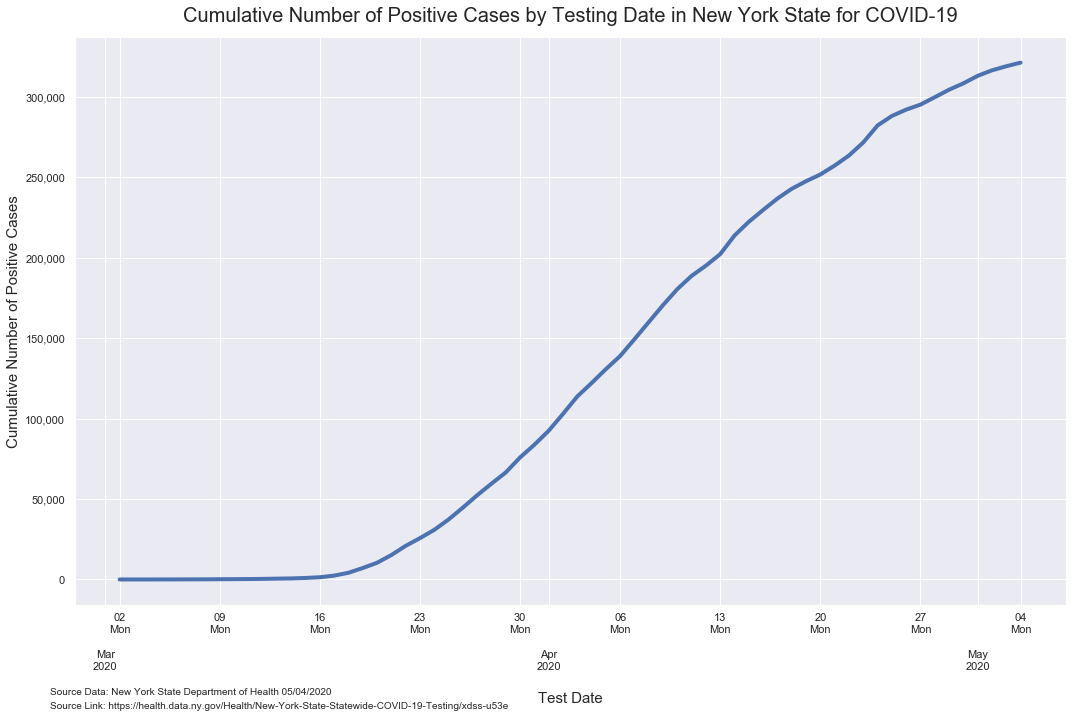

In [91]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             data=covid_19_nys_data_total, linewidth=4, ci=None)

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Testing Date in New York State for COVID-19', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-nys')

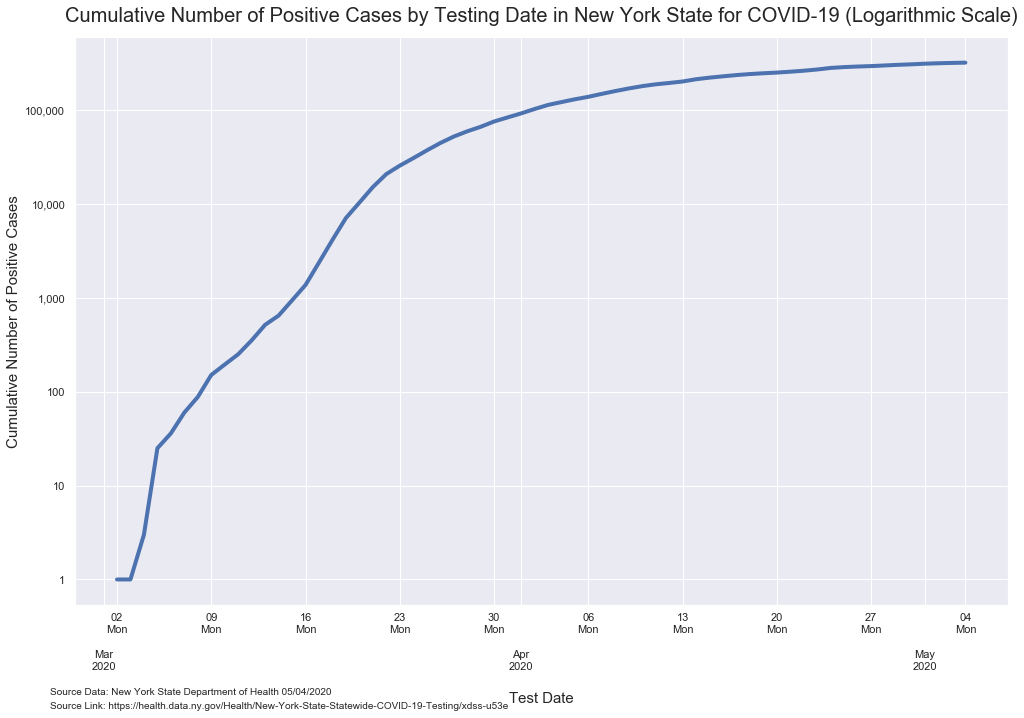

In [92]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             data=covid_19_nys_data_total, linewidth=4, ci=None)
ax1.set_yscale('log')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Testing Date in New York State for COVID-19 (Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-nys-log')

# Bar Plots

In [93]:
bar_plot = covid_19_nys_data.sort_values(by = 'Test Date', 
                    ascending=False).drop_duplicates(
                    subset ="County", keep = 'first')

In [94]:
bar_plot = bar_plot.sort_values(by = 'Cumulative Number of Positives', ascending=True)

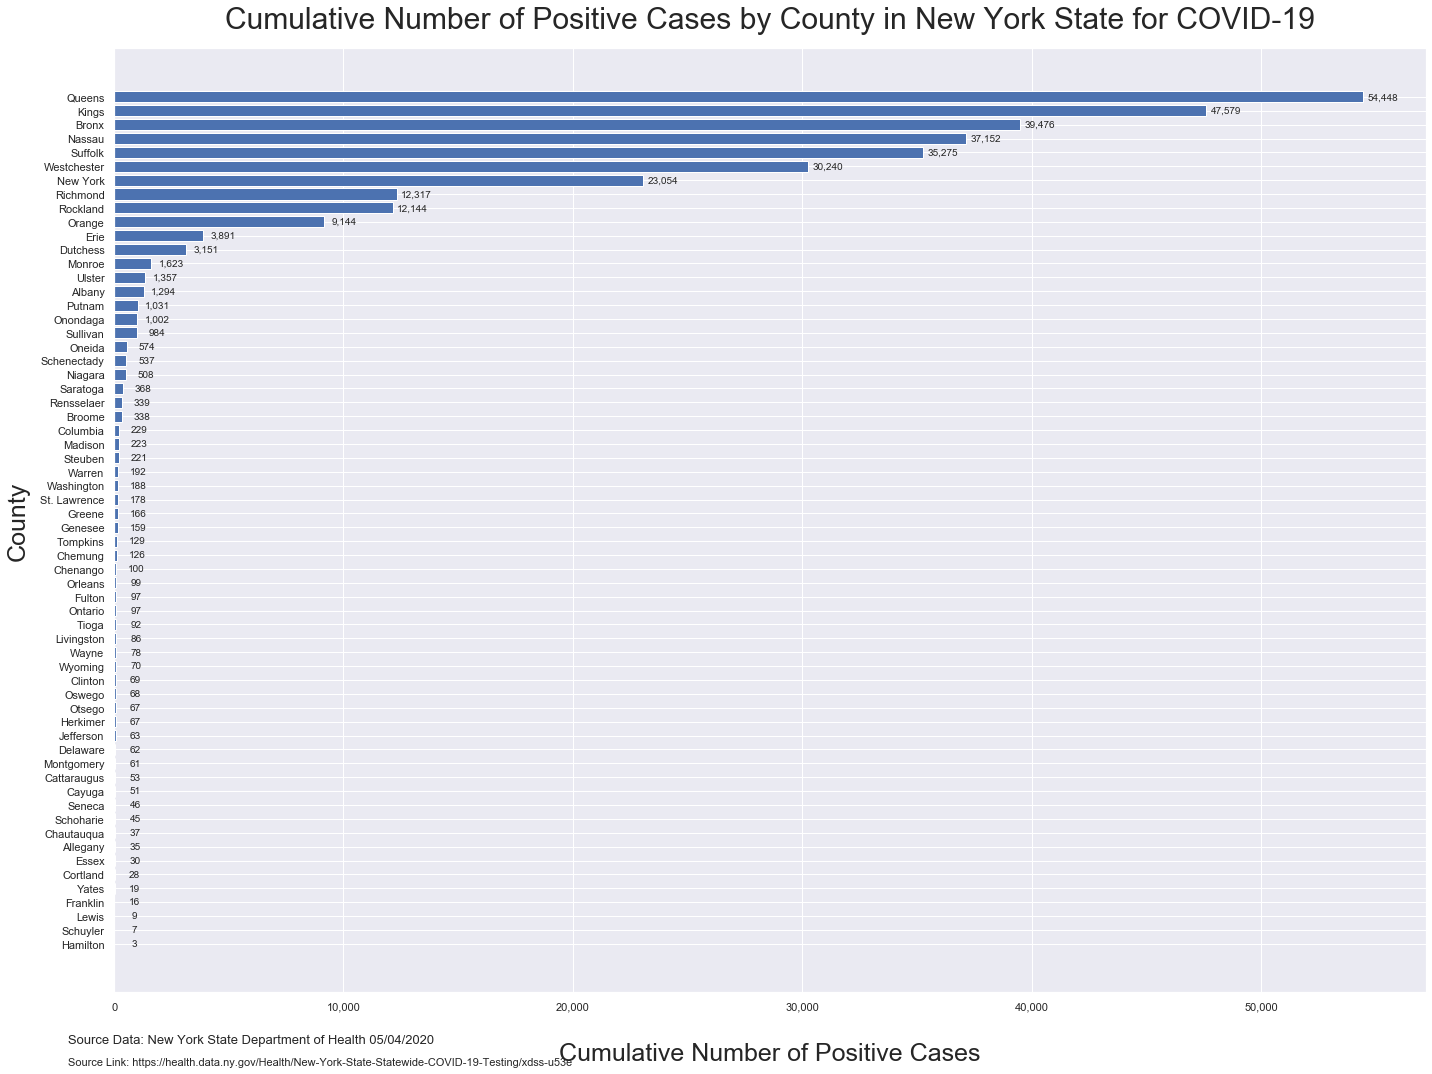

In [95]:
plt.subplots(figsize=(20,15))
ax = plt.subplot()

label_1 = ax.barh(bar_plot.County, bar_plot['Cumulative Number of Positives'])
plt.xlabel("Cumulative Number of Positive Cases", labelpad=14, fontsize=25)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel("County", labelpad=14, fontsize=25)
ax.xaxis.labelpad = 30
ax.yaxis.labelpad = 10

def autolabel_1(rects):
    for rect in rects:
        width = rect.get_width()
        yloc = rect.get_y() + rect.get_height() / 2
        ax.annotate('{:,}'.format(width), 
                    xy=(width, yloc), 
                    xytext=(20, 0),
                    textcoords="offset points",
                    ha='center', va='center')
                
autolabel_1(label_1)

txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=13)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=11)

plt.title("Cumulative Number of Positive Cases by County in New York State for COVID-19", pad=20, fontsize=30)
plt.tight_layout()
plt.savefig('figures/cases-by-county-barh')

In [96]:
from_ten_cases_top_10

Test Date       County  New Positives  Cumulative Number of Positives  \
128  2020-05-04        Bronx            253                           39476   
129  2020-05-03        Bronx            307                           39223   
130  2020-05-02        Bronx            466                           38916   
131  2020-05-01        Bronx            665                           38450   
132  2020-04-30        Bronx            541                           37785   
...         ...          ...            ...                             ...   
3640 2020-03-09  Westchester             42                             102   
3641 2020-03-08  Westchester             18                              60   
3642 2020-03-07  Westchester             22                              42   
3643 2020-03-06  Westchester              0                              20   
3644 2020-03-05  Westchester             19                              20   

      Total Number of Tests Performed  Cumulative Number of Tests Performed  \
128                              2001                                103476   
129                              1869                                101475   
130                              2857                                 99606   
131                              3694                                 96749   
132                              2824                                 93055   
...                               ...                                   ...   
3640                              222                                   592   
3641                              207                                   370   
3642                              110                                   163   
3643                                9                                    53   
3644                               42                                    44   

     ten_cases_date  days_from_10_cases  
128      2020-03-12                  53  
129      2020-03-12                  52  
130      2020-03-12                  51  
131      2020-03-12                  50  
132      2020-03-12                  49  
...             ...                 ...  
3640     2020-03-05                   4  
3641     2020-03-05                   3  
3642     2020-03-05                   2  
3643     2020-03-05                   1  
3644     2020-03-05                   0  

[552 rows x 8 columns]

In [97]:
growth_rate = from_ten_cases_top_10.sort_values(by=['County', 'Test Date', 'Cumulative Number of Positives'], 
                                                ascending=[True, True, True])

In [98]:
growth_rate['growth_rate'] = (growth_rate['New Positives'] / growth_rate['New Positives'].shift(1))

In [99]:
growth_rate.head()

Test Date County  New Positives  Cumulative Number of Positives  \
181 2020-03-12  Bronx              3                              10   
180 2020-03-13  Bronx             10                              20   
179 2020-03-14  Bronx              8                              28   
178 2020-03-15  Bronx             29                              57   
177 2020-03-16  Bronx             29                              86   

     Total Number of Tests Performed  Cumulative Number of Tests Performed  \
181                               36                                   190   
180                               99                                   289   
179                               80                                   369   
178                              116                                   485   
177                              151                                   636   

    ten_cases_date  days_from_10_cases  growth_rate  
181     2020-03-12                   0          NaN  
180     2020-03-12                   1     3.333333  
179     2020-03-12                   2     0.800000  
178     2020-03-12                   3     3.625000  
177     2020-03-12                   4     1.000000

In [100]:
growth_rate = growth_rate.loc[growth_rate.days_from_10_cases != 0]

In [101]:
growth_rate.sort_values(by='growth_rate')

Test Date       County  New Positives  Cumulative Number of Positives  \
3643 2020-03-06  Westchester              0                              20   
2121 2020-04-25       Orange            133                            8106   
2633 2020-04-25     Rockland            165                           11256   
3639 2020-03-10  Westchester              9                             111   
1846 2020-03-11     New York              3                              27   
...         ...          ...            ...                             ...   
1812 2020-04-14     New York           1737                           16617   
1845 2020-03-12     New York             18                              45   
1456 2020-03-17        Kings            264                             387   
2673 2020-03-16     Rockland              9                              22   
3642 2020-03-07  Westchester             22                              42   

      Total Number of Tests Performed  Cumulative Number of Tests Performed  \
3643                                9                                    53   
2121                              643                                 24508   
2633                              677                                 28272   
3639                              177                                   769   
1846                               70                                   280   
...                               ...                                   ...   
1812                             4068                                 40517   
1845                              186                                   466   
1456                              741                                  1500   
2673                               39                                   122   
3642                              110                                   163   

     ten_cases_date  days_from_10_cases  growth_rate  
3643     2020-03-05                   1     0.000000  
2121     2020-03-15                  41     0.162592  
2633     2020-03-14                  42     0.165000  
3639     2020-03-05                   5     0.214286  
1846     2020-03-09                   2     0.250000  
...             ...                 ...          ...  
1812     2020-03-09                  36     4.583113  
1845     2020-03-09                   3     6.000000  
1456     2020-03-10                   7     6.769231  
2673     2020-03-14                   2     9.000000  
3642     2020-03-05                   2          inf  

[542 rows x 9 columns]

In [102]:
growth_rate.sort_values(by='growth_rate', ascending=False)

Test Date       County  New Positives  Cumulative Number of Positives  \
3642 2020-03-07  Westchester             22                              42   
2673 2020-03-16     Rockland              9                              22   
1456 2020-03-17        Kings            264                             387   
1845 2020-03-12     New York             18                              45   
1812 2020-04-14     New York           1737                           16617   
...         ...          ...            ...                             ...   
1846 2020-03-11     New York              3                              27   
3639 2020-03-10  Westchester              9                             111   
2633 2020-04-25     Rockland            165                           11256   
2121 2020-04-25       Orange            133                            8106   
3643 2020-03-06  Westchester              0                              20   

      Total Number of Tests Performed  Cumulative Number of Tests Performed  \
3642                              110                                   163   
2673                               39                                   122   
1456                              741                                  1500   
1845                              186                                   466   
1812                             4068                                 40517   
...                               ...                                   ...   
1846                               70                                   280   
3639                              177                                   769   
2633                              677                                 28272   
2121                              643                                 24508   
3643                                9                                    53   

     ten_cases_date  days_from_10_cases  growth_rate  
3642     2020-03-05                   2          inf  
2673     2020-03-14                   2     9.000000  
1456     2020-03-10                   7     6.769231  
1845     2020-03-09                   3     6.000000  
1812     2020-03-09                  36     4.583113  
...             ...                 ...          ...  
1846     2020-03-09                   2     0.250000  
3639     2020-03-05                   5     0.214286  
2633     2020-03-14                  42     0.165000  
2121     2020-03-15                  41     0.162592  
3643     2020-03-05                   1     0.000000  

[542 rows x 9 columns]

In [103]:
inf = [np.inf, -np.inf]
growth_rate['growth_rate'] = growth_rate['growth_rate'].replace(inf, np.nan)

In [104]:
growth_rate['growth_rate'] = growth_rate['growth_rate'].fillna(method='ffill')

In [105]:
growth_rate.isna().sum()

Test Date                               0
County                                  0
New Positives                           0
Cumulative Number of Positives          0
Total Number of Tests Performed         0
Cumulative Number of Tests Performed    0
ten_cases_date                          0
days_from_10_cases                      0
growth_rate                             0
dtype: int64

In [106]:
growth_rate.head()

Test Date County  New Positives  Cumulative Number of Positives  \
180 2020-03-13  Bronx             10                              20   
179 2020-03-14  Bronx              8                              28   
178 2020-03-15  Bronx             29                              57   
177 2020-03-16  Bronx             29                              86   
176 2020-03-17  Bronx            123                             209   

     Total Number of Tests Performed  Cumulative Number of Tests Performed  \
180                               99                                   289   
179                               80                                   369   
178                              116                                   485   
177                              151                                   636   
176                              433                                  1069   

    ten_cases_date  days_from_10_cases  growth_rate  
180     2020-03-12                   1     3.333333  
179     2020-03-12                   2     0.800000  
178     2020-03-12                   3     3.625000  
177     2020-03-12                   4     1.000000  
176     2020-03-12                   5     4.241379

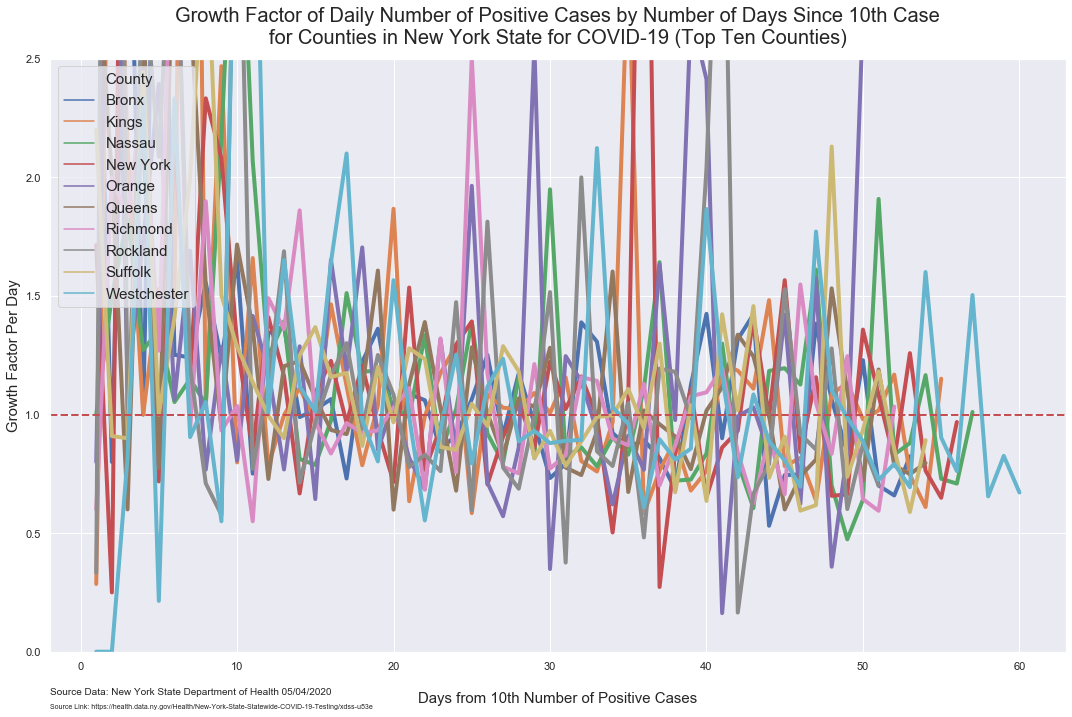

In [107]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="growth_rate",
             hue="County", data=growth_rate , linewidth=4)

ax1.axhline(1, color='r', lw=2, linestyle='dashed')

ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.ylim(0, 2.5)

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Growth Factor Per Day', fontsize=15)
plt.title('Growth Factor of Daily Number of Positive Cases by Number of Days Since 10th Case\nfor Counties in New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/growth-factor-by-county-top-10')

In [108]:
growth_rate_weekly = growth_rate.set_index('Test Date').groupby('County').resample('W').agg({'days_from_10_cases': 
                                                                    np.max, 'growth_rate': np.mean})

In [109]:
growth_rate_weekly

days_from_10_cases  growth_rate
County      Test Date                                  
Bronx       2020-03-15                   3     2.586111
            2020-03-22                  10     1.739366
            2020-03-29                  17     1.038612
            2020-04-05                  24     1.067501
            2020-04-12                  31     0.984170
...                                    ...          ...
Westchester 2020-04-12                  38     1.045997
            2020-04-19                  45     1.057481
            2020-04-26                  52     0.994165
            2020-05-03                  59     0.991922
            2020-05-10                  60     0.671362

[90 rows x 2 columns]

In [110]:
growth_rate_weekly.reset_index(inplace=True)
growth_rate_weekly.rename(columns={'growth_rate': 'growth_rate_weekly_average'}, inplace=True)

In [111]:
growth_rate_weekly

County  Test Date  days_from_10_cases  growth_rate_weekly_average
0         Bronx 2020-03-15                   3                    2.586111
1         Bronx 2020-03-22                  10                    1.739366
2         Bronx 2020-03-29                  17                    1.038612
3         Bronx 2020-04-05                  24                    1.067501
4         Bronx 2020-04-12                  31                    0.984170
..          ...        ...                 ...                         ...
85  Westchester 2020-04-12                  38                    1.045997
86  Westchester 2020-04-19                  45                    1.057481
87  Westchester 2020-04-26                  52                    0.994165
88  Westchester 2020-05-03                  59                    0.991922
89  Westchester 2020-05-10                  60                    0.671362

[90 rows x 4 columns]

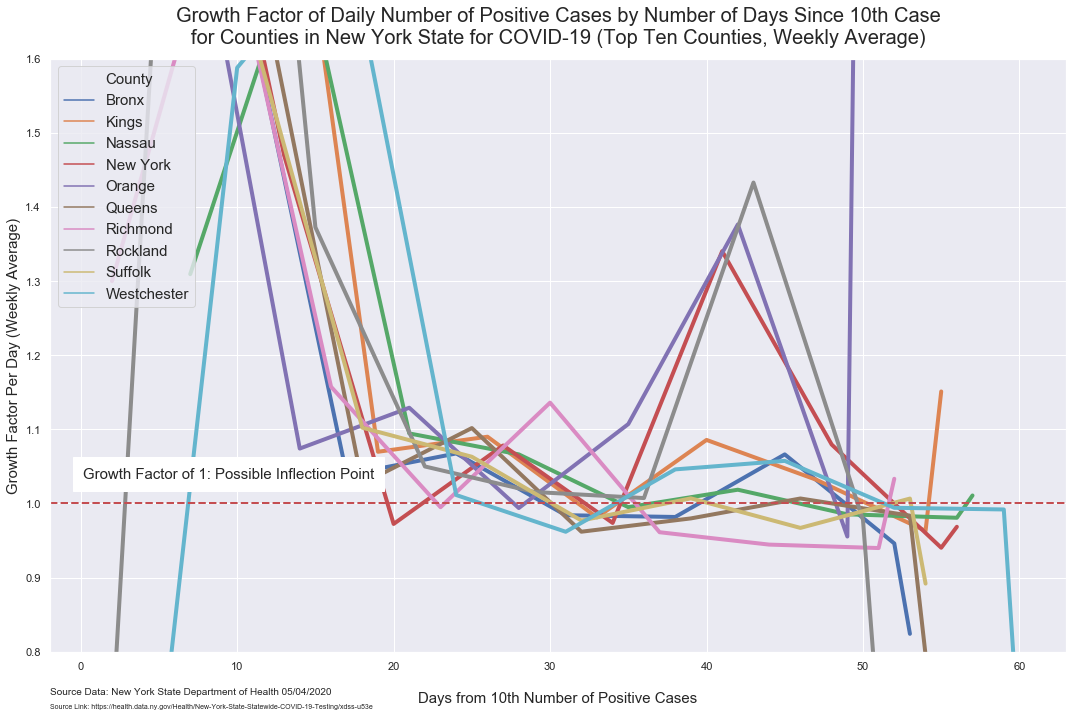

In [112]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')
txt3 = ('Growth Factor of 1: Possible Inflection Point')


sns.lineplot(x="days_from_10_cases", y="growth_rate_weekly_average",
             hue="County", data=growth_rate_weekly, linewidth=4)

ax1.axhline(1, color='r', lw=2, linestyle='dashed')

ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.ylim(0.8, 1.6)

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Growth Factor Per Day (Weekly Average)', fontsize=15)
plt.title('Growth Factor of Daily Number of Positive Cases by Number of Days Since 10th Case\nfor Counties in New York State for COVID-19 (Top Ten Counties, Weekly Average)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)
plt.figtext(0.08, 0.33, txt3, wrap=True, horizontalalignment='left', fontsize=15, bbox=dict(facecolor='white', edgecolor='white', pad=10.0))

plt.tight_layout()
plt.savefig('figures/growth-factor-by-county-top-10-weekly')

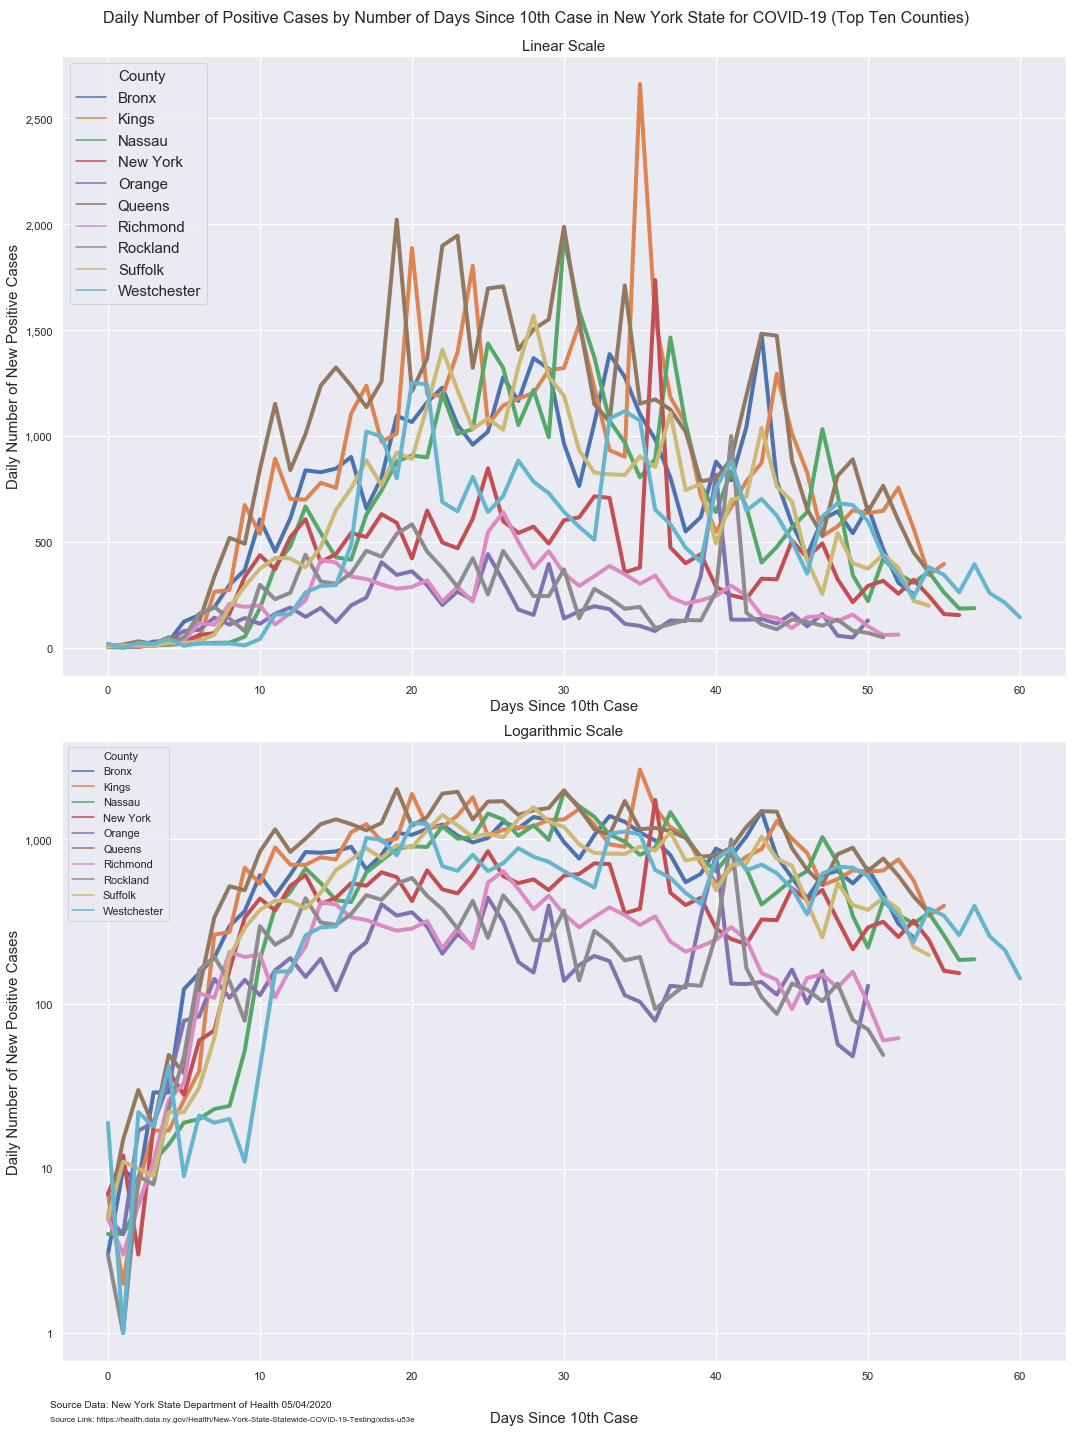

In [113]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(15,20))
fig.suptitle('Daily Number of Positive Cases by Number of Days Since 10th Case in New York State for COVID-19 (Top Ten Counties)', y = .99, fontsize=16)
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

# Plot 1
ax1 = plt.subplot(211)
sns.lineplot(x="days_from_10_cases", y="New Positives",
             hue="County",
             data=from_ten_cases_top_10, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.legend(loc='upper left', fontsize=15)


# Plot 2

ax2 = plt.subplot(212)
sns.lineplot(x="days_from_10_cases", y="New Positives",
             hue="County",
             data=temp_fill_zeros, linewidth=4)
ax2.set_yscale('log')

ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Setting Titles
ax1.set_title('\n\nLinear Scale', fontsize=15)
ax2.set_title('Logarithmic Scale', fontsize=15)

# Setting Labels
ax1.set_xlabel('Days Since 10th Case', fontsize=15)
ax2.set_xlabel('Days Since 10th Case', fontsize=15, labelpad = 20)
ax1.set_ylabel('Daily Number of New Positive Cases', fontsize=15)
ax2.set_ylabel('Daily Number of New Positive Cases', fontsize=15)

ax2.xaxis.labelpad = 30

plt.figtext(0.05, 0.02, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=8)

plt.tight_layout()
plt.savefig('figures/daily_cases_subplot1')

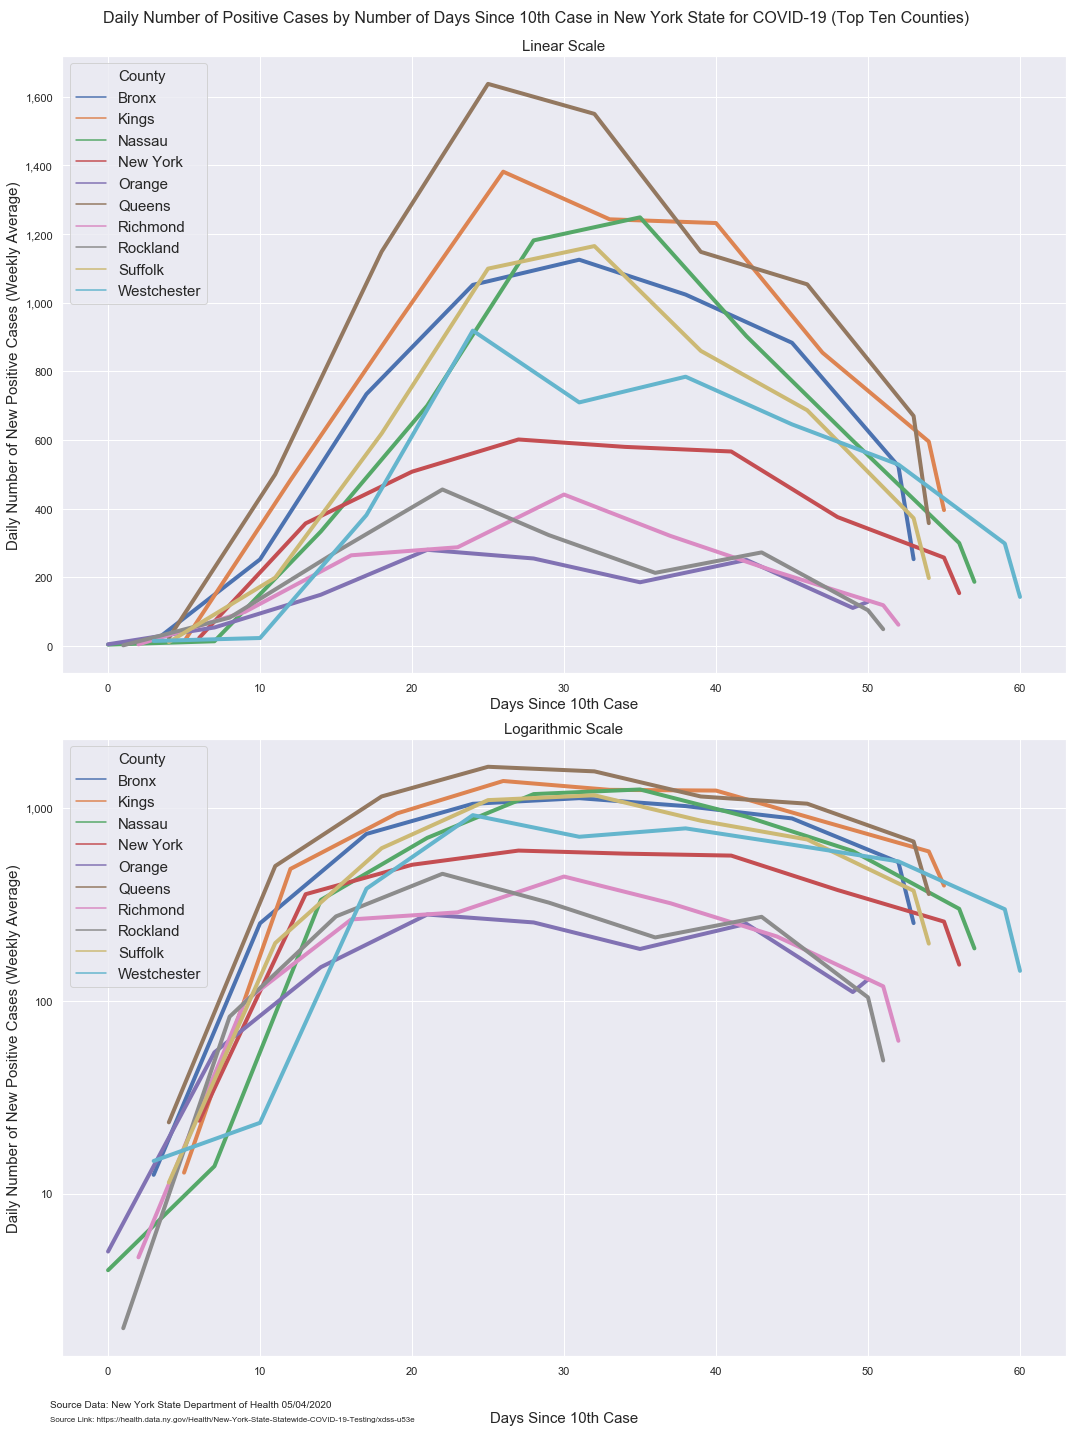

In [114]:
fig, [ax3, ax4] = plt.subplots(2, 1, figsize=(15,20))
fig.suptitle('Daily Number of Positive Cases by Number of Days Since 10th Case in New York State for COVID-19 (Top Ten Counties)', y = .99, fontsize=16)
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

# Plot 3
ax3 = plt.subplot(211)
sns.lineplot(x="days_from_10_cases", y="New Positives Weekly Average",
             hue="County",
             data=from_ten_cases_top_10_weekly, linewidth=4, ax=ax3)

ax3.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax3.legend(loc='upper left', fontsize=15)

# # Plot 4
ax4 = plt.subplot(212)
sns.lineplot(x="days_from_10_cases", y="New Positives Weekly Average",
             hue="County",
             data=from_ten_cases_top_10_weekly, linewidth=4)
ax4.set_yscale('log')

ax4.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax4.legend(loc='upper left', fontsize=15)

# Setting Labels
ax3.set_xlabel('Days Since 10th Case', fontsize=15)
ax4.set_xlabel('Days Since 10th Case', fontsize=15)
ax3.set_ylabel('Daily Number of New Positive Cases (Weekly Average)', fontsize=15)
ax4.set_ylabel('Daily Number of New Positive Cases (Weekly Average)', fontsize=15)


# Setting Titles
ax3.set_title('\n\nLinear Scale', fontsize=15)
ax4.set_title('Logarithmic Scale', fontsize=15)

ax4.xaxis.labelpad = 35

plt.figtext(0.05, 0.02, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=8)

plt.tight_layout()
plt.savefig('figures/daily_cases_subplot2')

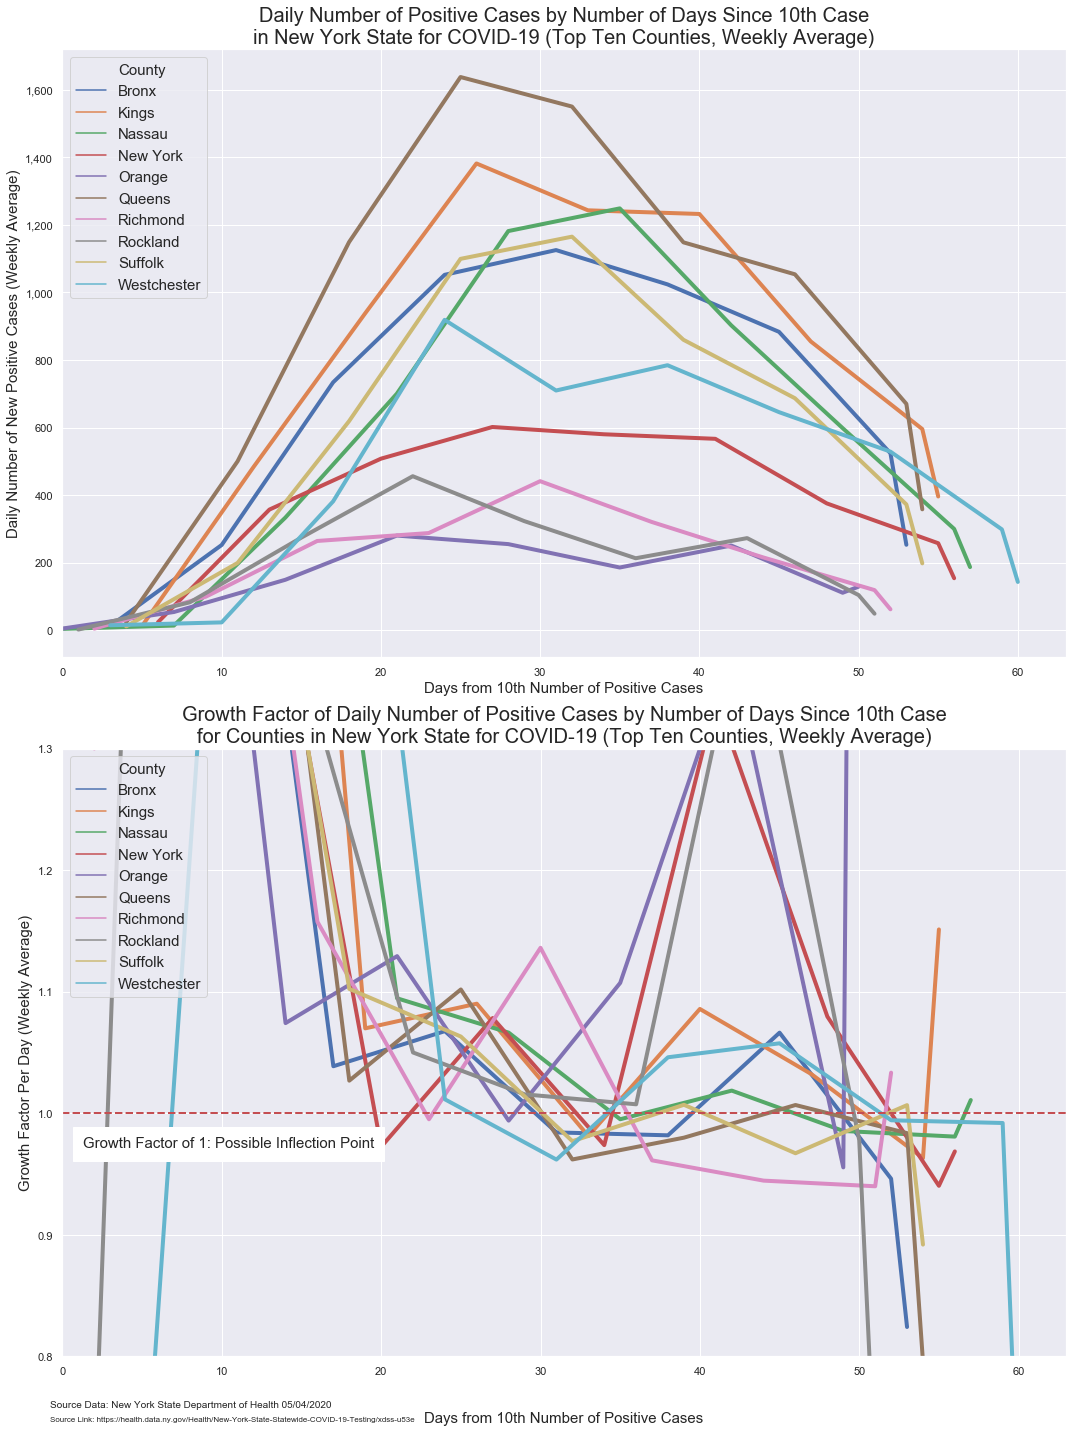

In [115]:
fig, [ax3, ax4] = plt.subplots(2, 1, figsize=(15,20))

txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')
txt3 = ('Growth Factor of 1: Possible Inflection Point')

# Plot 3
ax3 = plt.subplot(211)
sns.lineplot(x="days_from_10_cases", y="New Positives Weekly Average",
             hue="County",
             data=from_ten_cases_top_10_weekly, linewidth=4, ax=ax3)

ax3.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax3.legend(loc='upper left', fontsize=15)
plt.xlim(0)

# # Plot 4
ax4 = plt.subplot(212)
sns.lineplot(x="days_from_10_cases", y="growth_rate_weekly_average",
             hue="County", data=growth_rate_weekly, linewidth=4)

ax4.axhline(1, color='r', lw=2, linestyle='dashed')
ax4.legend(loc='upper left', fontsize=15)
ax4.xaxis.labelpad = 20
plt.ylim(0.8, 1.3)
plt.xlim(0)

# Setting Labels
ax3.set_xlabel('Days from 10th Number of Positive Cases', fontsize=15)
ax4.set_xlabel('Days from 10th Number of Positive Cases', fontsize=15)
ax3.set_ylabel('Daily Number of New Positive Cases (Weekly Average)', fontsize=15)
ax4.set_ylabel('Growth Factor Per Day (Weekly Average)', fontsize=15)
ax4.xaxis.labelpad = 35


# Setting Titles
ax3.set_title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties, Weekly Average)', 
              fontsize=20)
ax4.set_title('Growth Factor of Daily Number of Positive Cases by Number of Days Since 10th Case\nfor Counties in New York State for COVID-19 (Top Ten Counties, Weekly Average)', 
              fontsize=20)

plt.figtext(0.05, 0.02, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=8)
plt.figtext(0.08, 0.2, txt3, wrap=True, horizontalalignment='left', fontsize=15, bbox=dict(facecolor='white', edgecolor='white', pad=10.0))

plt.tight_layout()
plt.savefig('figures/daily_cases_subplot3')

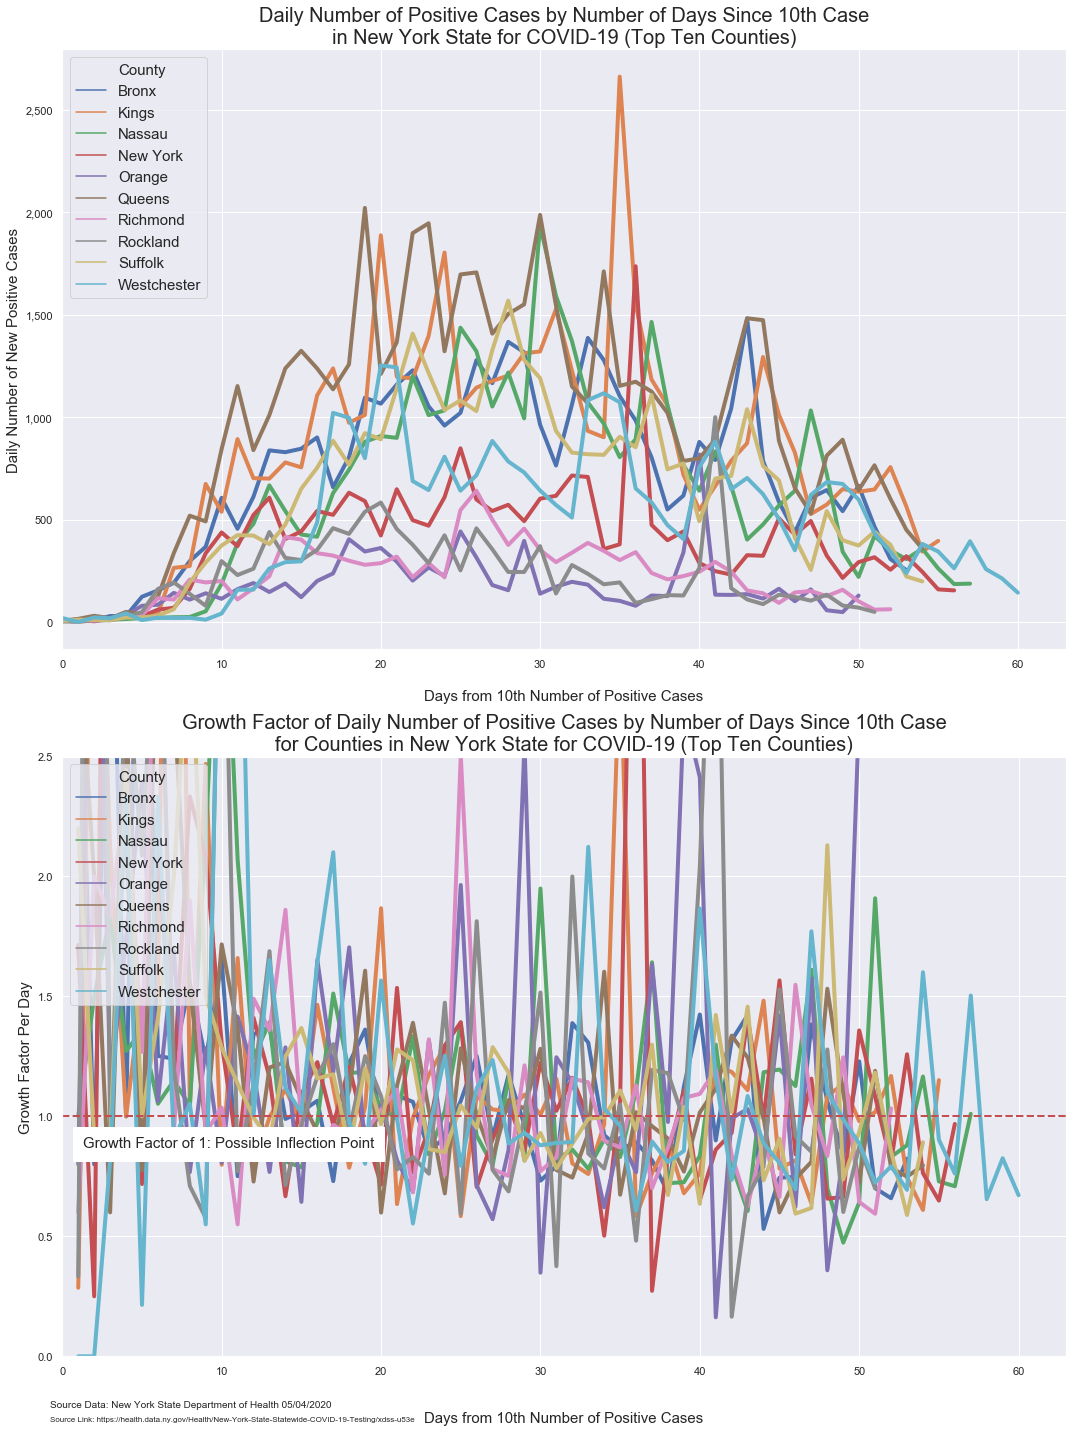

In [116]:
fig, [ax0, ax1] = plt.subplots(2, 1, figsize=(15,20))

txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')
txt3 = ('Growth Factor of 1: Possible Inflection Point')

# Plot 3
ax0 = plt.subplot(211)
sns.lineplot(x="days_from_10_cases", y="New Positives",
             hue="County",
             data=from_ten_cases_top_10, linewidth=4)
ax0.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax0.xaxis.labelpad = 20
ax0.legend(loc='upper left', fontsize=15)
plt.xlim(0)
plt.title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)

# # Plot 4
ax1 = plt.subplot(212)
sns.lineplot(x="days_from_10_cases", y="growth_rate",
             hue="County", data=growth_rate , linewidth=4)

ax1.axhline(1, color='r', lw=2, linestyle='dashed')
ax1.xaxis.labelpad = 20
plt.ylim(0, 2.5)
ax1.legend(loc='upper left', fontsize=15)
plt.xlim(0)
plt.title('Growth Factor of Daily Number of Positive Cases by Number of Days Since 10th Case\nfor Counties in New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)

# Setting Labels
ax1.set_xlabel('Days from 10th Number of Positive Cases', fontsize=15)
ax0.set_xlabel('Days from 10th Number of Positive Cases', fontsize=15)
ax0.set_ylabel('Daily Number of New Positive Cases', fontsize=15)
ax1.set_ylabel('Growth Factor Per Day', fontsize=15)


# Setting Titles
ax0.set_title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties)', 
              fontsize=20)
ax1.set_title('Growth Factor of Daily Number of Positive Cases by Number of Days Since 10th Case\nfor Counties in New York State for COVID-19 (Top Ten Counties)', 
              fontsize=20)

ax1.xaxis.labelpad = 35

plt.figtext(0.05, 0.02, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=8)
plt.figtext(0.08, 0.2, txt3, wrap=True, horizontalalignment='left', fontsize=15, bbox=dict(facecolor='white', edgecolor='white', pad=10.0))


plt.tight_layout()
plt.savefig('figures/daily_cases_subplot4')